In [174]:
pip install graphviz

In [175]:
# 데이터 조작 라이브러리
import pandas as pd
import numpy as np
# 그래프
import matplotlib.pyplot as plt
import matplotlib

# export_graphviz: 나무 구조 생성 및 저장 
from sklearn.tree import export_graphviz
# graphviz : 나무 구조 시각화  (.dot 확장자 파일 불러오기 등)
import graphviz

from sklearn.preprocessing import StandardScaler
# 데이터 분할:train, test
from sklearn.model_selection import train_test_split
# 분류모델 평가 함수
from sklearn.metrics import accuracy_score, f1_score 
from sklearn.metrics import confusion_matrix, classification_report

#글꼴
matplotlib.rc('font', family = 'Malgun Gothic')
matplotlib.rc('axes', unicode_minus = False)

In [409]:
df= pd.read_csv("Big Data 분석/SCALE불량.csv", encoding= 'euc-kr')
df.head()

,PLATE_NO,ROLLING_DATE,SCALE,SPEC,STEEL_KIND,PT_THICK,PT_WIDTH,PT_LENGTH,PT_WEIGHT,FUR_NO,...,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
0,PB562774,2021-08-01:08:00:01,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,1144,116,1133,59,282,1125,934,적용,8,2조
1,PB562775,2021-08-01:08:07:11,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,1144,122,1135,53,283,1120,937,적용,8,2조
2,PB562776,2021-08-01:08:14:21,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,1129,116,1121,55,282,1106,889,적용,8,3조
3,PB562777,2021-08-01:08:21:31,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,1152,125,1127,68,316,1113,885,적용,8,3조
4,PB562778,2021-08-01:08:28:41,양품,BV-EH36-TM,T8,38.33,3098,13334,12430,3호기,...,1140,134,1128,48,314,1118,873,적용,8,1조


In [63]:
df.count()

PLATE_NO             720
ROLLING_DATE         720
SCALE                720
SPEC                 720
STEEL_KIND           720
PT_THICK             720
PT_WIDTH             720
PT_LENGTH            720
PT_WEIGHT            720
FUR_NO               720
FUR_NO_ROW           720
FUR_HZ_TEMP          720
FUR_HZ_TIME          720
FUR_SZ_TEMP          720
FUR_SZ_TIME          720
FUR_TIME             720
FUR_EXTEMP           720
ROLLING_TEMP_T5      720
HSB                  720
ROLLING_DESCALING    720
WORK_GR              720
dtype: int64

In [416]:
from datetime import date, timedelta`

In [420]:
dft = pd.to_datetime(df['ROLLING_DATE']).dt_date

ParserError: Unknown string format: 2021-08-01:08:00:01

In [64]:
df.isnull().sum()

PLATE_NO             0
ROLLING_DATE         0
SCALE                0
SPEC                 0
STEEL_KIND           0
PT_THICK             0
PT_WIDTH             0
PT_LENGTH            0
PT_WEIGHT            0
FUR_NO               0
FUR_NO_ROW           0
FUR_HZ_TEMP          0
FUR_HZ_TIME          0
FUR_SZ_TEMP          0
FUR_SZ_TIME          0
FUR_TIME             0
FUR_EXTEMP           0
ROLLING_TEMP_T5      0
HSB                  0
ROLLING_DESCALING    0
WORK_GR              0
dtype: int64

In [65]:
dfx= df[df.SCALE == '불량']
dfx.count()

PLATE_NO             231
ROLLING_DATE         231
SCALE                231
SPEC                 231
STEEL_KIND           231
PT_THICK             231
PT_WIDTH             231
PT_LENGTH            231
PT_WEIGHT            231
FUR_NO               231
FUR_NO_ROW           231
FUR_HZ_TEMP          231
FUR_HZ_TIME          231
FUR_SZ_TEMP          231
FUR_SZ_TIME          231
FUR_TIME             231
FUR_EXTEMP           231
ROLLING_TEMP_T5      231
HSB                  231
ROLLING_DESCALING    231
WORK_GR              231
dtype: int64

<AxesSubplot:xlabel='SCALE,FUR_NO'>

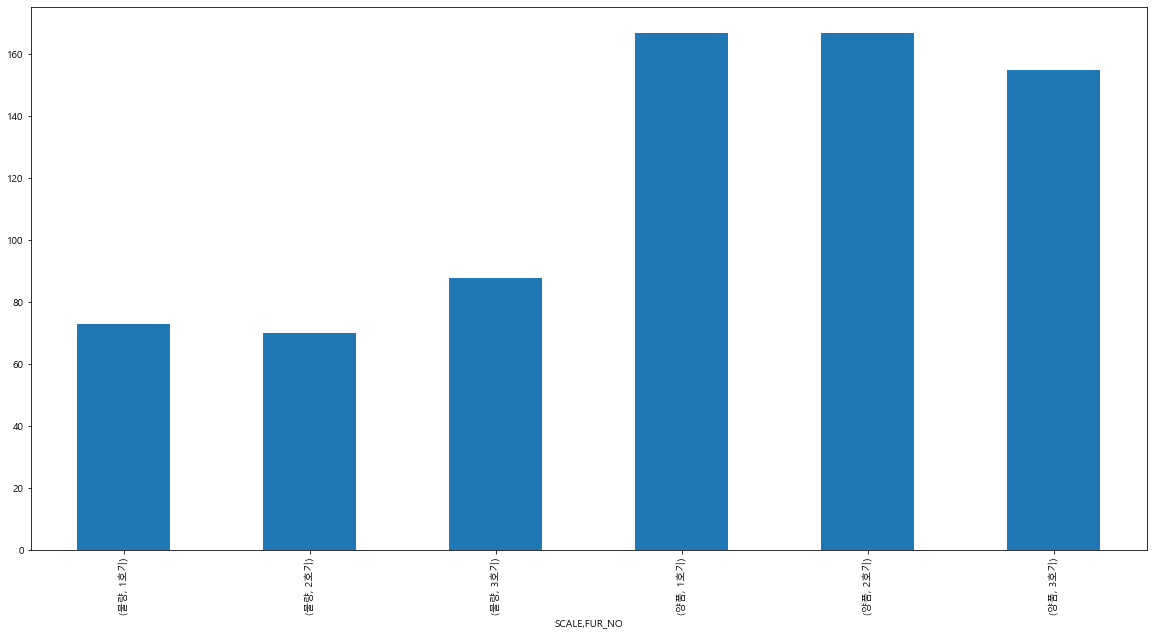

In [66]:
df_count = df.groupby(['SCALE','FUR_NO']).size()
df_count.plot.bar(figsize = (20,10))

<AxesSubplot:xlabel='SCALE,HSB'>

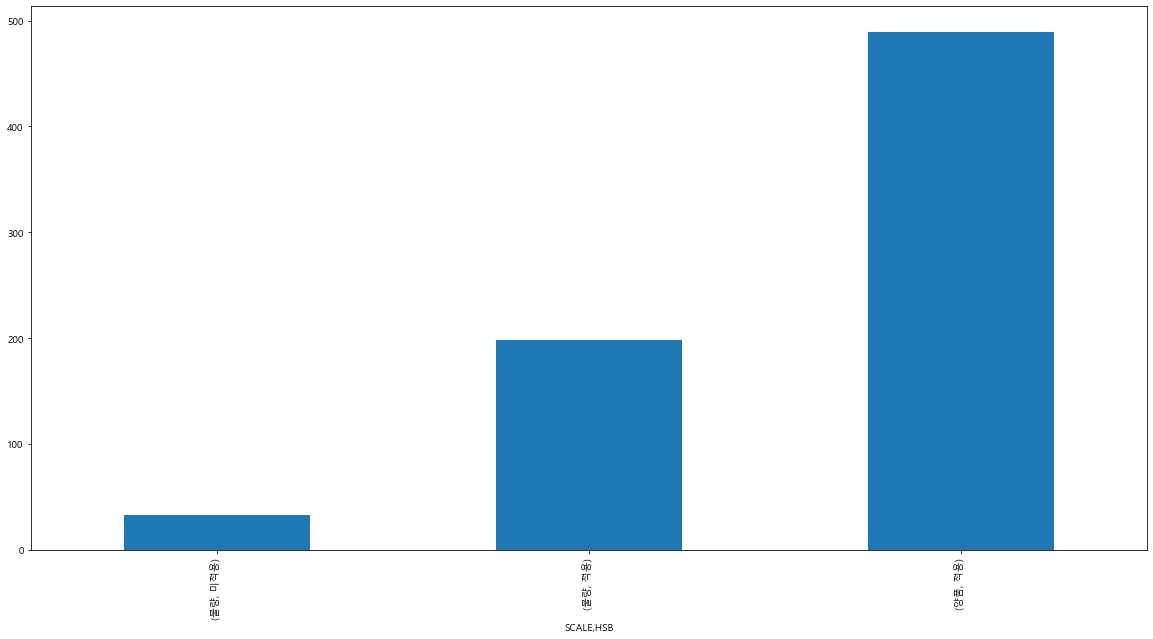

In [67]:
df_count1 = df.groupby(['SCALE','HSB']).size()
df_count1.plot.bar(figsize = (20,10))

<AxesSubplot:xlabel='SCALE,FUR_NO,FUR_NO_ROW'>

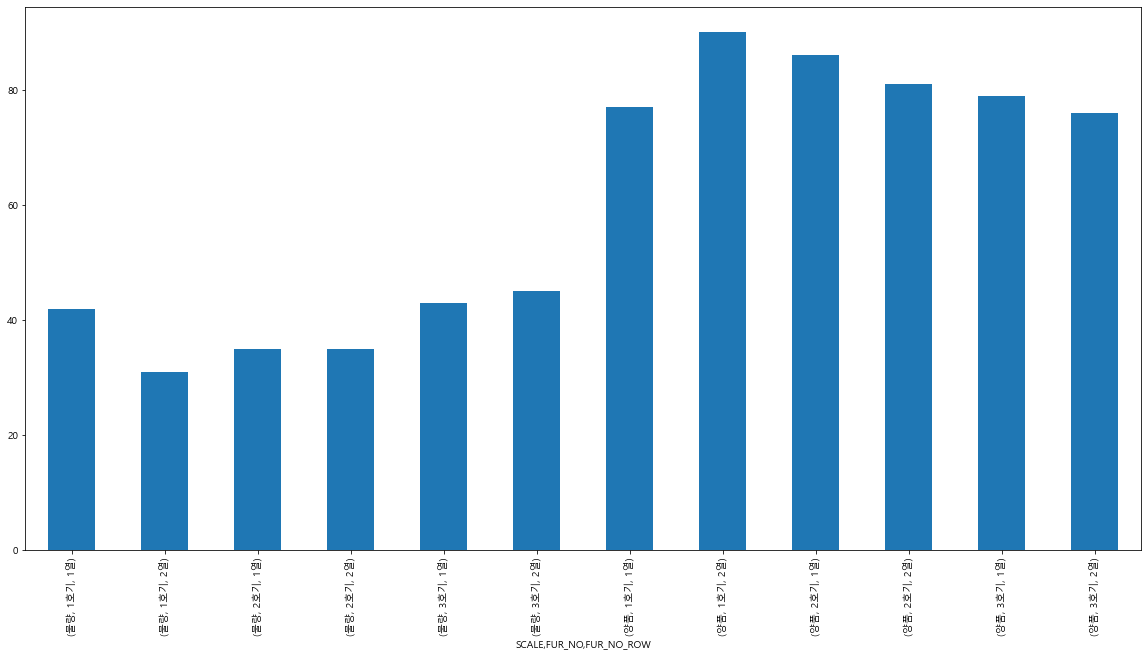

In [68]:
df_count1 = df.groupby(['SCALE','FUR_NO','FUR_NO_ROW']).size()
df_count1.plot.bar(figsize = (20,10))

<AxesSubplot:xlabel='SCALE,WORK_GR'>

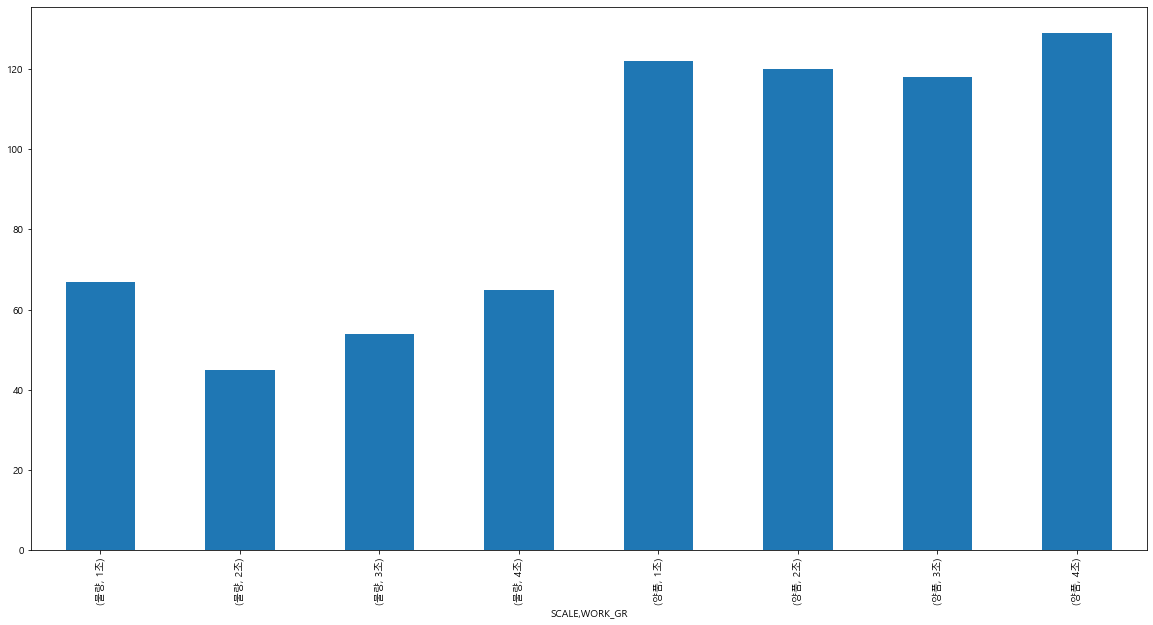

In [69]:
df_count1 = df.groupby(['SCALE','WORK_GR']).size()
df_count1.plot.bar(figsize = (20,10))

<AxesSubplot:xlabel='SCALE,ROLLING_DESCALING'>

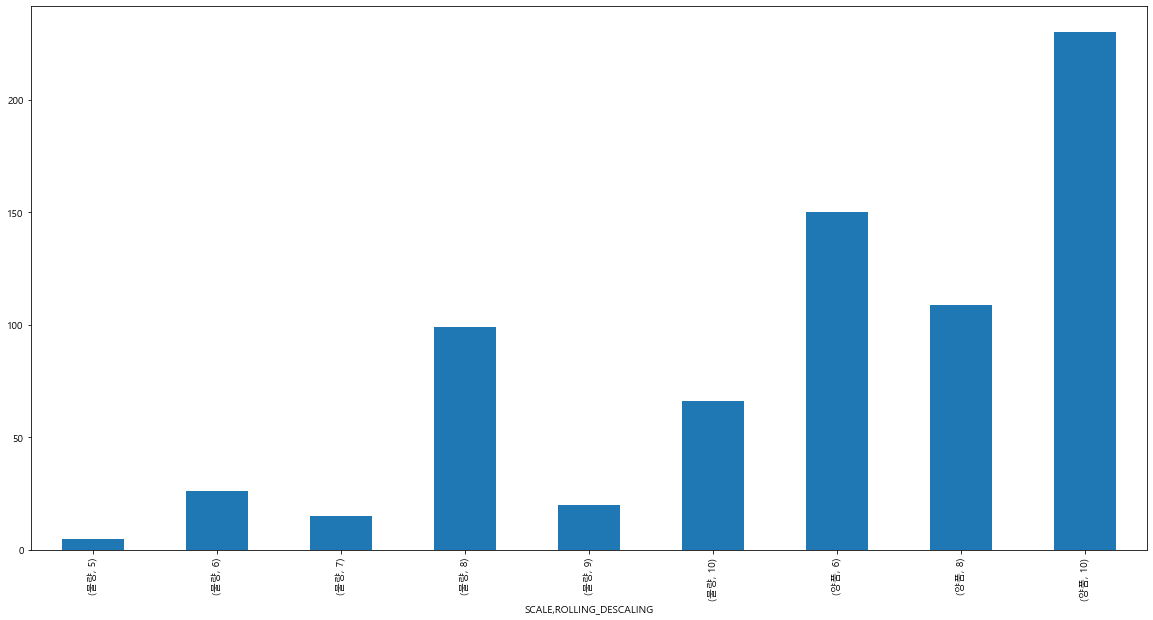

In [70]:
df_count1 = df.groupby(['SCALE','ROLLING_DESCALING']).size()
df_count1.plot.bar(figsize = (20,10))

In [71]:
df.describe()
#연속형 변수에 대해 boxplot 으로 확인 필요
#ROLLING_TEMP_T5  최소값 0???????

,PT_THICK,PT_WIDTH,PT_LENGTH,PT_WEIGHT,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,ROLLING_DESCALING
count,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000
mean,29.267857,2807.127778,34323.269444,41481.777778,1155.338889,88.204167,1149.666667,75.330556,300.563889,1139.570833,933.920833,8.319444
std,19.152651,517.839690,13828.434837,24751.322015,20.866398,36.248696,17.571788,26.086390,45.390303,17.857121,107.863887,1.623252
min,12.030000,1800.000000,7893.000000,7820.000000,1103.000000,43.000000,1113.000000,35.000000,221.000000,1102.000000,0.000000,5.000000
25%,16.090000,2466.000000,22663.000000,17757.500000,1139.000000,65.000000,1132.000000,57.750000,257.000000,1122.750000,889.750000,6.000000
50%,20.130000,2725.000000,37380.000000,36120.000000,1158.000000,75.000000,1155.000000,67.500000,304.000000,1144.000000,951.000000,8.000000
75%,40.000000,3125.000000,43735.000000,61120.000000,1171.000000,101.000000,1164.000000,85.250000,342.000000,1154.000000,994.250000,10.000000
max,100.340000,4575.000000,54917.000000,115080.000000,1206.000000,251.000000,1185.000000,194.000000,398.000000,1175.000000,1078.000000,10.000000


<AxesSubplot:>

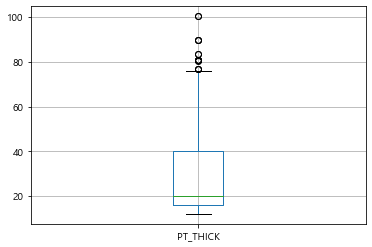

In [72]:
df.boxplot(column=['PT_THICK'])

In [73]:
df[df.PT_THICK ==100.34]

,PLATE_NO,ROLLING_DATE,SCALE,SPEC,STEEL_KIND,PT_THICK,PT_WIDTH,PT_LENGTH,PT_WEIGHT,FUR_NO,...,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
640,PB563427,2021-08-04:12:26:41,불량,JS-SM400A,C0,100.34,2315,9547,17410,3호기,...,1144,85,1150,52,269,1140,1050,적용,6,3조
641,PB563428,2021-08-04:12:33:51,불량,JS-SM400A,C0,100.34,2315,9547,17410,1호기,...,1130,78,1137,61,268,1127,1037,적용,6,4조


In [74]:
df[df.SPEC=='JS-SM400A']
#문제 있다보기 어렵다

,PLATE_NO,ROLLING_DATE,SCALE,SPEC,STEEL_KIND,PT_THICK,PT_WIDTH,PT_LENGTH,PT_WEIGHT,FUR_NO,...,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
640,PB563427,2021-08-04:12:26:41,불량,JS-SM400A,C0,100.34,2315,9547,17410,3호기,...,1144,85,1150,52,269,1140,1050,적용,6,3조
641,PB563428,2021-08-04:12:33:51,불량,JS-SM400A,C0,100.34,2315,9547,17410,1호기,...,1130,78,1137,61,268,1127,1037,적용,6,4조


<AxesSubplot:>

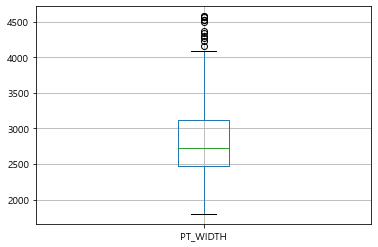

In [75]:
df.boxplot(column=['PT_WIDTH'])

<AxesSubplot:>

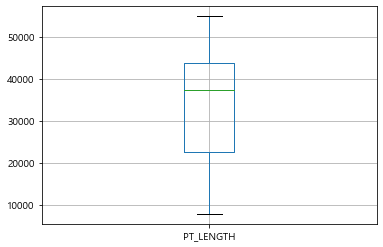

In [76]:
df.boxplot(column=['PT_LENGTH'])

In [77]:
df[df.PT_WEIGHT ==115080.0]
#흠,,,,, 이상하긴한데... 함부로 뻬기 어려워보인다.

,PLATE_NO,ROLLING_DATE,SCALE,SPEC,STEEL_KIND,PT_THICK,PT_WIDTH,PT_LENGTH,PT_WEIGHT,FUR_NO,...,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
121,PB562895,2021-08-01:22:27:11,양품,JS-SM490YB,C0,20.1,3094,39288,115080,1호기,...,1169,136,1167,56,350,1158,988,적용,8,4조


<AxesSubplot:>

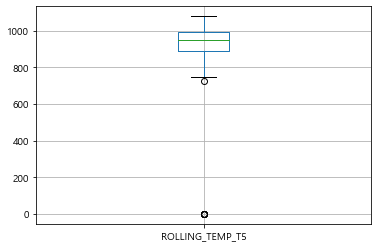

In [78]:
df.boxplot(column=['ROLLING_TEMP_T5'])

In [363]:
df[df.ROLLING_TEMP_T5 ==0]

,PLATE_NO,ROLLING_DATE,SCALE,SPEC,STEEL_KIND,PT_THICK,PT_WIDTH,PT_LENGTH,PT_WEIGHT,FUR_NO,...,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
41,PB562815,2021-08-01:12:53:51,양품,GL-E36-TM,T8,55.51,3765,11398,37400,3호기,...,1132,95,1128,80,341,1123,0,적용,6,1조
184,PB562958,2021-08-02:05:58:41,양품,JS-SM490YB,C0,16.09,2221,43596,61150,3호기,...,1169,64,1164,61,308,1155,0,적용,10,3조
185,PB562959,2021-08-02:06:05:51,양품,JS-SM490YB,C0,16.09,2221,43596,61150,3호기,...,1163,57,1166,67,303,1158,0,적용,10,4조
494,PB563268,2021-08-03:19:00:21,양품,PILAC-BT33,T5,80.82,2085,12919,17090,2호기,...,1133,89,1122,59,378,1112,0,적용,6,2조
495,PB563269,2021-08-03:19:07:31,양품,PILAC-BT33,T5,80.82,2085,13176,17430,1호기,...,1130,92,1124,61,362,1116,0,적용,6,3조
496,PB563270,2021-08-03:19:14:41,양품,NV-D32-TM,T0,40.35,2497,23592,37320,3호기,...,1119,109,1117,76,383,1107,0,적용,6,3조


In [364]:
df = df[df['ROLLING_TEMP_T5']!=0]
#이상치 제거

In [365]:
df['FUR_HZ_X'] = df['FUR_HZ_TEMP']*df['FUR_HZ_TIME']
df[['FUR_HZ_X']]

,FUR_HZ_X
0,132704
1,139568
2,130964
3,144000
4,152760
...,...
715,84384
716,70150
717,75985
718,101394


In [366]:
df['FUR_SZ_X'] = df['FUR_SZ_TEMP']*df['FUR_SZ_TIME']
df[['FUR_SZ_X']]

,FUR_SZ_X
0,66847
1,60155
2,61655
3,76636
4,54144
...,...
715,72168
716,71309
717,89551
718,52335


In [367]:
df

,PLATE_NO,ROLLING_DATE,SCALE,SPEC,STEEL_KIND,PT_THICK,PT_WIDTH,PT_LENGTH,PT_WEIGHT,FUR_NO,...,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR,FUR_HZ_X,FUR_SZ_X
0,PB562774,2021-08-01:08:00:01,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,1133,59,282,1125,934,적용,8,2조,132704,66847
1,PB562775,2021-08-01:08:07:11,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,1135,53,283,1120,937,적용,8,2조,139568,60155
2,PB562776,2021-08-01:08:14:21,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,1121,55,282,1106,889,적용,8,3조,130964,61655
3,PB562777,2021-08-01:08:21:31,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,1127,68,316,1113,885,적용,8,3조,144000,76636
4,PB562778,2021-08-01:08:28:41,양품,BV-EH36-TM,T8,38.33,3098,13334,12430,3호기,...,1128,48,314,1118,873,적용,8,1조,152760,54144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,PB563502,2021-08-04:21:24:11,불량,NK-KA,C0,20.14,3580,38639,21870,3호기,...,1164,62,245,1155,1005,적용,8,2조,84384,72168
716,PB563503,2021-08-04:21:31:21,양품,NV-A32,C0,15.08,3212,48233,18340,2호기,...,1169,61,238,1160,947,적용,10,1조,70150,71309
717,PB563504,2021-08-04:21:38:31,양품,NV-A32,C0,16.60,3441,43688,19590,2호기,...,1163,77,247,1152,948,적용,10,4조,75985,89551
718,PB563505,2021-08-04:21:45:41,양품,LR-A,C0,15.59,3363,48740,80240,3호기,...,1163,45,243,1154,940,적용,10,2조,101394,52335


In [368]:
df.corr()

,PT_THICK,PT_WIDTH,PT_LENGTH,PT_WEIGHT,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,ROLLING_DESCALING,FUR_HZ_X,FUR_SZ_X
PT_THICK,1.000000,-0.313982,-0.862009,-0.393838,-0.519935,0.171393,-0.691723,0.276230,0.406057,-0.685023,-0.502704,-0.836348,0.148805,0.252427
PT_WIDTH,-0.313982,1.000000,0.121079,0.030278,0.180829,-0.129236,0.229158,-0.055904,-0.392895,0.217433,-0.112685,0.342620,-0.122433,-0.048713
PT_LENGTH,-0.862009,0.121079,1.000000,0.449407,0.468151,-0.088247,0.641383,-0.233087,-0.244587,0.637787,0.434156,0.807222,-0.067389,-0.210105
PT_WEIGHT,-0.393838,0.030278,0.449407,1.000000,0.149540,0.009361,0.356296,-0.194298,-0.053666,0.358073,0.420157,0.234354,0.017234,-0.183330
FUR_HZ_TEMP,-0.519935,0.180829,0.468151,0.149540,1.000000,-0.110199,0.770410,-0.330770,-0.341638,0.755721,0.356122,0.464936,-0.070227,-0.307695
FUR_HZ_TIME,0.171393,-0.129236,-0.088247,0.009361,-0.110199,1.000000,-0.208088,0.067258,0.485242,-0.194017,0.003902,-0.149643,0.999088,0.061146
FUR_SZ_TEMP,-0.691723,0.229158,0.641383,0.356296,0.770410,-0.208088,1.000000,-0.572170,-0.471246,0.985114,0.661994,0.643536,-0.177491,-0.542941
FUR_SZ_TIME,0.276230,-0.055904,-0.233087,-0.194298,-0.330770,0.067258,-0.572170,1.000000,0.496609,-0.571356,-0.479627,-0.288521,0.055959,0.999309
FUR_TIME,0.406057,-0.392895,-0.244587,-0.053666,-0.341638,0.485242,-0.471246,0.496609,1.000000,-0.462348,-0.209814,-0.360341,0.473850,0.489662
FUR_EXTEMP,-0.685023,0.217433,0.637787,0.358073,0.755721,-0.194017,0.985114,-0.571356,-0.462348,1.000000,0.656505,0.636695,-0.164034,-0.542745


In [369]:
df = df.drop('PLATE_NO', axis=1)
df.head()

,ROLLING_DATE,SCALE,SPEC,STEEL_KIND,PT_THICK,PT_WIDTH,PT_LENGTH,PT_WEIGHT,FUR_NO,FUR_NO_ROW,...,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR,FUR_HZ_X,FUR_SZ_X
0,2021-08-01:08:00:01,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,1열,...,1133,59,282,1125,934,적용,8,2조,132704,66847
1,2021-08-01:08:07:11,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,2열,...,1135,53,283,1120,937,적용,8,2조,139568,60155
2,2021-08-01:08:14:21,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,1열,...,1121,55,282,1106,889,적용,8,3조,130964,61655
3,2021-08-01:08:21:31,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,2열,...,1127,68,316,1113,885,적용,8,3조,144000,76636
4,2021-08-01:08:28:41,양품,BV-EH36-TM,T8,38.33,3098,13334,12430,3호기,1열,...,1128,48,314,1118,873,적용,8,1조,152760,54144


In [370]:
df = df.drop('ROLLING_DATE', axis=1)
df.head()

,SCALE,SPEC,STEEL_KIND,PT_THICK,PT_WIDTH,PT_LENGTH,PT_WEIGHT,FUR_NO,FUR_NO_ROW,FUR_HZ_TEMP,...,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR,FUR_HZ_X,FUR_SZ_X
0,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,1열,1144,...,1133,59,282,1125,934,적용,8,2조,132704,66847
1,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,2열,1144,...,1135,53,283,1120,937,적용,8,2조,139568,60155
2,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,1열,1129,...,1121,55,282,1106,889,적용,8,3조,130964,61655
3,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,2열,1152,...,1127,68,316,1113,885,적용,8,3조,144000,76636
4,양품,BV-EH36-TM,T8,38.33,3098,13334,12430,3호기,1열,1140,...,1128,48,314,1118,873,적용,8,1조,152760,54144


In [135]:
df_raw_x = df.drop('SCALE', axis = 1)
df_raw_x

,SPEC,STEEL_KIND,PT_THICK,PT_WIDTH,PT_LENGTH,PT_WEIGHT,FUR_NO,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR,FUR_HZ_X,FUR_SZ_X
0,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,1열,1144,116,1133,59,282,1125,934,적용,8,2조,132704,66847
1,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,2열,1144,122,1135,53,283,1120,937,적용,8,2조,139568,60155
2,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,1열,1129,116,1121,55,282,1106,889,적용,8,3조,130964,61655
3,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,2열,1152,125,1127,68,316,1113,885,적용,8,3조,144000,76636
4,BV-EH36-TM,T8,38.33,3098,13334,12430,3호기,1열,1140,134,1128,48,314,1118,873,적용,8,1조,152760,54144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,NK-KA,C0,20.14,3580,38639,21870,3호기,1열,1172,72,1164,62,245,1155,1005,적용,8,2조,84384,72168
716,NV-A32,C0,15.08,3212,48233,18340,2호기,1열,1150,61,1169,61,238,1160,947,적용,10,1조,70150,71309
717,NV-A32,C0,16.60,3441,43688,19590,2호기,2열,1169,65,1163,77,247,1152,948,적용,10,4조,75985,89551
718,LR-A,C0,15.59,3363,48740,80240,3호기,2열,1179,86,1163,45,243,1154,940,적용,10,2조,101394,52335


In [136]:
df_raw_y = df[['SCALE']]
df_raw_y

,SCALE
0,양품
1,양품
2,양품
3,양품
4,양품
...,...
715,불량
716,양품
717,양품
718,양품


In [137]:
df_raw_dummy = pd.get_dummies(df_raw_x)
df_raw_dummy

,PT_THICK,PT_WIDTH,PT_LENGTH,PT_WEIGHT,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,...,FUR_NO_2호기,FUR_NO_3호기,FUR_NO_ROW_1열,FUR_NO_ROW_2열,HSB_미적용,HSB_적용,WORK_GR_1조,WORK_GR_2조,WORK_GR_3조,WORK_GR_4조
0,32.25,3707,15109,14180,1144,116,1133,59,282,1125,...,0,0,1,0,0,1,0,1,0,0
1,32.25,3707,15109,14180,1144,122,1135,53,283,1120,...,0,0,0,1,0,1,0,1,0,0
2,33.27,3619,19181,18130,1129,116,1121,55,282,1106,...,1,0,1,0,0,1,0,0,1,0
3,33.27,3619,19181,18130,1152,125,1127,68,316,1113,...,1,0,0,1,0,1,0,0,1,0
4,38.33,3098,13334,12430,1140,134,1128,48,314,1118,...,0,1,1,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,20.14,3580,38639,21870,1172,72,1164,62,245,1155,...,0,1,1,0,0,1,0,1,0,0
716,15.08,3212,48233,18340,1150,61,1169,61,238,1160,...,1,0,1,0,0,1,1,0,0,0
717,16.60,3441,43688,19590,1169,65,1163,77,247,1152,...,1,0,0,1,0,1,0,0,0,1
718,15.59,3363,48740,80240,1179,86,1163,45,243,1154,...,0,1,0,1,0,1,0,1,0,0


In [138]:
v_feature_name = df_raw_dummy.columns
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_raw_dummy)
df_scaled = pd.DataFrame(df_scaled, columns=v_feature_name)
df_scaled

,PT_THICK,PT_WIDTH,PT_LENGTH,PT_WEIGHT,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,...,FUR_NO_2호기,FUR_NO_3호기,FUR_NO_ROW_1열,FUR_NO_ROW_2열,HSB_미적용,HSB_적용,WORK_GR_1조,WORK_GR_2조,WORK_GR_3조,WORK_GR_4조
0,0.165524,1.738825,-1.399249,-1.102663,-0.550140,0.764075,-0.958762,-0.626900,-0.401705,-0.824152,...,-0.702655,-0.709336,0.994413,-0.994413,-0.220132,0.220132,-0.597841,1.83130,-0.556859,-0.608639
1,0.165524,1.738825,-1.399249,-1.102663,-0.550140,0.929201,-0.844450,-0.856285,-0.379613,-1.105167,...,-0.702655,-0.709336,-1.005618,1.005618,-0.220132,0.220132,-0.597841,1.83130,-0.556859,-0.608639
2,0.219261,1.568260,-1.103953,-0.943272,-1.270256,0.764075,-1.644633,-0.779823,-0.401705,-1.892008,...,1.423174,-0.709336,0.994413,-0.994413,-0.220132,0.220132,-0.597841,-0.54606,1.795787,-0.608639
3,0.219261,1.568260,-1.103953,-0.943272,-0.166077,1.011765,-1.301698,-0.282822,0.349415,-1.498588,...,1.423174,-0.709336,-1.005618,1.005618,-0.220132,0.220132,-0.597841,-0.54606,1.795787,-0.608639
4,0.485835,0.558436,-1.527970,-1.173279,-0.742171,1.259454,-1.244542,-1.047439,0.305232,-1.217573,...,-0.702655,1.409769,0.994413,-0.994413,-0.220132,0.220132,1.672684,-0.54606,-0.556859,-0.608639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,-0.472463,1.492668,0.307114,-0.792355,0.794078,-0.446851,0.813071,-0.512207,-1.219101,0.861936,...,-0.702655,1.409769,0.994413,-0.994413,-0.220132,0.220132,-0.597841,1.83130,-0.556859,-0.608639
710,-0.739037,0.779396,1.002858,-0.934798,-0.262093,-0.749582,1.098850,-0.550438,-1.373743,1.142951,...,1.423174,-0.709336,0.994413,-0.994413,-0.220132,0.220132,1.672684,-0.54606,-0.556859,-0.608639
711,-0.658960,1.223253,0.673261,-0.884358,0.650055,-0.639498,0.755915,0.061255,-1.174917,0.693327,...,1.423174,-0.709336,-1.005618,1.005618,-0.220132,0.220132,-0.597841,-0.54606,-0.556859,1.643010
712,-0.712169,1.072070,1.039625,1.562992,1.130133,-0.061556,0.755915,-1.162131,-1.263285,0.805733,...,-0.702655,1.409769,-1.005618,1.005618,-0.220132,0.220132,-0.597841,1.83130,-0.556859,-0.608639


# 로지스틱 회귀분석

In [297]:
# 로지스틱 회귀
from statsmodels.api import Logit

In [298]:
df

,SCALE,SPEC,STEEL_KIND,PT_THICK,PT_WIDTH,PT_LENGTH,PT_WEIGHT,FUR_NO,FUR_NO_ROW,FUR_HZ_TEMP,...,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR,FUR_HZ_X,FUR_SZ_X
0,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,1열,1144,...,1133,59,282,1125,934,적용,8,2조,132704,66847
1,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,2열,1144,...,1135,53,283,1120,937,적용,8,2조,139568,60155
2,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,1열,1129,...,1121,55,282,1106,889,적용,8,3조,130964,61655
3,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,2열,1152,...,1127,68,316,1113,885,적용,8,3조,144000,76636
4,양품,BV-EH36-TM,T8,38.33,3098,13334,12430,3호기,1열,1140,...,1128,48,314,1118,873,적용,8,1조,152760,54144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,불량,NK-KA,C0,20.14,3580,38639,21870,3호기,1열,1172,...,1164,62,245,1155,1005,적용,8,2조,84384,72168
716,양품,NV-A32,C0,15.08,3212,48233,18340,2호기,1열,1150,...,1169,61,238,1160,947,적용,10,1조,70150,71309
717,양품,NV-A32,C0,16.60,3441,43688,19590,2호기,2열,1169,...,1163,77,247,1152,948,적용,10,4조,75985,89551
718,양품,LR-A,C0,15.59,3363,48740,80240,3호기,2열,1179,...,1163,45,243,1154,940,적용,10,2조,101394,52335


In [303]:
def abc(x):
    if x =='양품':
        return 1
    if x =='불량':
        return 0

df['SCALE'] = df['SCALE'].apply(abc)
df

,SCALE,SPEC,STEEL_KIND,PT_THICK,PT_WIDTH,PT_LENGTH,PT_WEIGHT,FUR_NO,FUR_NO_ROW,FUR_HZ_TEMP,...,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR,FUR_HZ_X,FUR_SZ_X
0,1,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,1열,1144,...,1133,59,282,1125,934,적용,8,2조,132704,66847
1,1,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,2열,1144,...,1135,53,283,1120,937,적용,8,2조,139568,60155
2,1,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,1열,1129,...,1121,55,282,1106,889,적용,8,3조,130964,61655
3,1,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,2열,1152,...,1127,68,316,1113,885,적용,8,3조,144000,76636
4,1,BV-EH36-TM,T8,38.33,3098,13334,12430,3호기,1열,1140,...,1128,48,314,1118,873,적용,8,1조,152760,54144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,0,NK-KA,C0,20.14,3580,38639,21870,3호기,1열,1172,...,1164,62,245,1155,1005,적용,8,2조,84384,72168
716,1,NV-A32,C0,15.08,3212,48233,18340,2호기,1열,1150,...,1169,61,238,1160,947,적용,10,1조,70150,71309
717,1,NV-A32,C0,16.60,3441,43688,19590,2호기,2열,1169,...,1163,77,247,1152,948,적용,10,4조,75985,89551
718,1,LR-A,C0,15.59,3363,48740,80240,3호기,2열,1179,...,1163,45,243,1154,940,적용,10,2조,101394,52335


In [304]:
# train_test_split(데이터, test_size = test 데이터 비율, random_state: 랜덤)
df_train, df_test = train_test_split(df, # 데이터
                                     test_size = 0.3, # test 데이터의 비율
                                     random_state = 1234)  # random state

print("train data size : {}".format(df_train.shape))
print("test data size : {}".format(df_test.shape))

train data size : (499, 21)
test data size : (215, 21)


In [306]:
df_train

,SCALE,SPEC,STEEL_KIND,PT_THICK,PT_WIDTH,PT_LENGTH,PT_WEIGHT,FUR_NO,FUR_NO_ROW,FUR_HZ_TEMP,...,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR,FUR_HZ_X,FUR_SZ_X
209,0,JS-SM490A,C0,30.13,2288,30730,33260,3호기,2열,1165,...,1158,85,291,1146,1032,적용,8,3조,92035,98430
60,0,COMMON,T8,65.69,2498,11978,15430,1호기,1열,1142,...,1134,73,343,1123,851,적용,5,4조,125620,82782
13,1,COMMON,T0,30.23,1940,34797,16020,1호기,2열,1119,...,1120,65,324,1112,926,적용,8,4조,145470,72800
152,0,JS-SS400,C0,35.15,2466,31229,106250,1호기,2열,1159,...,1162,72,303,1149,1030,적용,8,4조,70699,83664
488,1,PILAC-BT33,T5,75.16,2280,15373,20680,3호기,1열,1119,...,1119,70,366,1109,878,적용,6,2조,135399,78330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
670,1,SA283-C,C0,18.16,3126,31483,70150,3호기,2열,1184,...,1167,52,250,1158,991,적용,10,3조,79328,60684
375,1,NV-A,C0,20.14,3278,30873,32000,2호기,2열,1191,...,1174,58,243,1159,982,적용,8,4조,73842,68092
207,0,JS-SM490A,C0,30.13,2288,30730,33260,2호기,2열,1160,...,1157,97,294,1148,1012,적용,8,3조,82360,112229
54,1,BV-EH36-TM,T8,60.57,2085,16583,32880,1호기,1열,1141,...,1133,73,332,1119,852,적용,6,1조,128933,82709


In [335]:
log_model = Logit.from_formula("""SCALE ~ PT_WIDTH+PT_LENGTH+PT_WEIGHT+C(FUR_NO)+C(FUR_NO_ROW)+\
FUR_HZ_TEMP+FUR_HZ_TIME+FUR_SZ_TEMP+FUR_SZ_TIME+FUR_TIME+FUR_EXTEMP+ROLLING_TEMP_T5+C(HSB)+ROLLING_DESCALING+C(WORK_GR)+FUR_HZ_X+FUR_SZ_X""", df_train)
# 적합
log_result = log_model.fit()

# 결과 출력
print(log_result.summary())

         Current function value: 0.258015
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                  SCALE   No. Observations:                  499
Model:                          Logit   Df Residuals:                      478
Method:                           MLE   Df Model:                           20
Date:                Fri, 19 Aug 2022   Pseudo R-squ.:                  0.5887
Time:                        02:53:08   Log-Likelihood:                -128.75
converged:                      False   LL-Null:                       -313.05
Covariance Type:            nonrobust   LLR p-value:                 6.479e-66
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             182.8962   5.63e+05      0.000      1.000    -1.1e+06     1.1e+06
C(FUR_NO)[T.2호기]        0.4364      0.

C:\Users\pyund\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<AxesSubplot:>

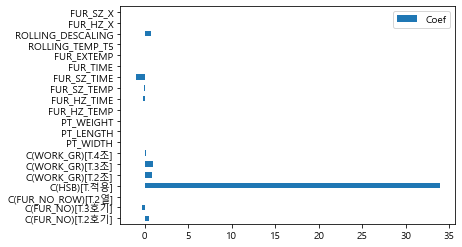

In [311]:
# 설명변수 중요도
df_logistic_coef = pd.DataFrame({"Coef": log_result.params.values[1:]}, index = log_model.exog_names[1:])
df_logistic_coef.plot.barh(y = "Coef")

In [312]:
# train 데이터 예측
y_pred_train = log_result.predict(df_train)
# 0과 1의 값을 가진 class로 변환
y_pred_train_class = (y_pred_train > 0.5).astype(int)
print("Train 예측 결과 \n", y_pred_train_class.head(), "\n")
print("Confusion Matrix: \n{}".format(confusion_matrix(df_train["SCALE"],y_pred_train_class)),"\n")

# test 데이터 예측
y_pred_test = log_result.predict(df_test)
# 0과 1의 값을 가진 class로 변환
y_pred_test_class = (y_pred_test > 0.5).astype(int)
print("Test 예측 결과 \n", y_pred_test_class.head(),"\n")
print("Confusion Matrix: \n{}".format(confusion_matrix(df_test["SCALE"],y_pred_test_class)),"\n")

Train 예측 결과 
 209    0
60     1
13     1
152    0
488    1
dtype: int32 

Confusion Matrix: 
[[133  27]
 [ 25 314]] 

Test 예측 결과 
 528    1
476    1
651    1
270    1
447    1
dtype: int32 

Confusion Matrix: 
[[ 53  18]
 [ 14 130]] 



In [316]:
# 실제 train 데이터와 예측 결과 비교
print("Train 예측/분류 결과")
print("Accuracy: {0:.3f}\n".format(accuracy_score(df_train["SCALE"], y_pred_train_class)))
print("Confusion Matrix: \n{}".format(confusion_matrix(df_train["SCALE"],y_pred_train_class)),"\n")
print(classification_report(df_train["SCALE"], y_pred_train_class, digits=3))

# 실제 train 데이터와 예측 결과 비교
print("Test 예측/분류 결과")
print("Accuracy: {0:.3f}\n".format(accuracy_score(df_test["SCALE"], y_pred_test_class)))
#[긍긍 부긍
#긍부 부부]
print("Confusion Matrix: \n{}".format(confusion_matrix(df_test["SCALE"],y_pred_test_class)),"\n")
print(classification_report(df_test["SCALE"], y_pred_test_class, digits=3))

Train 예측/분류 결과
Accuracy: 0.896

Confusion Matrix: 
[[133  27]
 [ 25 314]] 

              precision    recall  f1-score   support

           0      0.842     0.831     0.836       160
           1      0.921     0.926     0.924       339

    accuracy                          0.896       499
   macro avg      0.881     0.879     0.880       499
weighted avg      0.895     0.896     0.896       499

Test 예측/분류 결과
Accuracy: 0.851

Confusion Matrix: 
[[ 53  18]
 [ 14 130]] 

              precision    recall  f1-score   support

           0      0.791     0.746     0.768        71
           1      0.878     0.903     0.890       144

    accuracy                          0.851       215
   macro avg      0.835     0.825     0.829       215
weighted avg      0.850     0.851     0.850       215



In [124]:
# train 데이터 예측
y_pred_train = log_result.predict(df_train)
# 0과 1의 값을 가진 class로 변환
y_pred_train_class = (y_pred_train > 0.5).astype(int)
print("Train 예측 결과 \n", y_pred_train_class.head(), "\n")
print("Confusion Matrix: \n{}".format(confusion_matrix(df_train["SCALE"],y_pred_train_class)),"\n")

# test 데이터 예측
y_pred_test = log_result.predict(df_test)
# 0과 1의 값을 가진 class로 변환
y_pred_test_class = (y_pred_test > 0.5).astype(int)
print("Test 예측 결과 \n", y_pred_test_class.head(),"\n")
print("Confusion Matrix: \n{}".format(confusion_matrix(df_test["SCALE"],y_pred_test_class)),"\n")

Train 예측 결과 
 95     0
427    0
206    0
59     0
13     0
dtype: int32 

Confusion Matrix: 
[[160   0]
 [344   0]] 



PatsyError: predict requires that you use a DataFrame when predicting from a model
that was created using the formula api.

The original error message returned by patsy is:
Error converting data to categorical: observation with value 'LR-AH36' does not match any of the expected levels (expected: ['A131-DH36TM', 'A283-C', ..., 'SA283-C', 'V42JBN3'])
    SCALE ~ C(SPEC)+C(STEEL_KIND)+PT_WIDTH+PT_LENGTH+PT_WEIGHT+C(FUR_NO)+C(FUR_NO_ROW)+FUR_HZ_TEMP+FUR_HZ_TIME+FUR_SZ_TEMP+FUR_SZ_TIME+FUR_TIME+FUR_EXTEMP+ROLLING_TEMP_T5+C(HSB)+ROLLING_DESCALING+C(WORK_GR)+FUR_HZ_X+FUR_SZ_X
            ^^^^^^^

# 의사결정나무

In [339]:
# 분류 Decision Tree
from sklearn.tree import DecisionTreeClassifier


In [195]:
# train_test_split(X: 설명변수 데이터, Y: 목표변수 데이터, test_size = test 데이터 비율, random_state: 랜덤)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_dummy, # 설명변수 데이터
                                                                df_raw_y, # 목표변수 데이터
                                                                test_size = 0.3, # test 데이터의 비율
                                                                random_state = 1234)  # random state

print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (499, 100)
train data Y size : (499, 1)
test data X size : (215, 100)
test data Y size : (215, 1)


In [153]:
tree_uncustomized = DecisionTreeClassifier(random_state=1234)
tree_uncustomized.fit(df_train_x, df_train_y)

# 훈련 데이터 정확도
print("Accucary on training set: {:.3f}".format(tree_uncustomized.score(df_train_x, df_train_y)))
# test 데이터 정확도
print("Accucary on test set: {:.3f}".format(tree_uncustomized.score(df_test_x, df_test_y)))


Accucary on training set: 1.000
Accucary on test set: 0.930


In [154]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# max_depth: 최대 깊이 변경
para_depth = [depth for depth in range(1, 11)]

for max_depth in para_depth:
    tree = DecisionTreeClassifier(max_depth = max_depth, random_state=1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["TestAccuracy"] = test_accuracy
df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,1,0.890,0.888
1,2,0.938,0.921
2,3,0.966,0.953
3,4,0.976,0.953
4,5,0.978,0.953
5,6,0.978,0.953
6,7,0.982,0.940
7,8,0.984,0.935
8,9,0.986,0.953
9,10,0.988,0.935


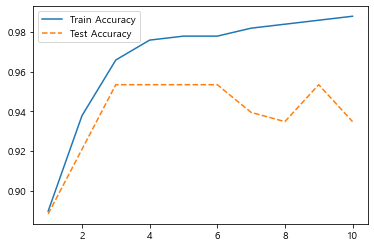

In [155]:
# 정확도를 그래프로 표현
plt.plot(para_depth, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_depth, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.legend()

In [160]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# min_samples_leaf: 잎사귀 수 제한
para_leaf = [n_leaf * 2 for n_leaf in range(1, 11)]

for min_samples_leaf in para_leaf:
    tree = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf, max_depth=4, random_state=1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf["MinSamplesLeaf"] = para_leaf
df_accuracy_leaf["TrainAccuracy"] = train_accuracy
df_accuracy_leaf["TestAccuracy"] = test_accuracy
df_accuracy_leaf.round(3)

,MinSamplesLeaf,TrainAccuracy,TestAccuracy
0,2,0.976,0.953
1,4,0.976,0.953
2,6,0.966,0.953
3,8,0.966,0.953
4,10,0.966,0.953
5,12,0.966,0.953
6,14,0.966,0.953
7,16,0.962,0.949
8,18,0.954,0.949
9,20,0.952,0.944


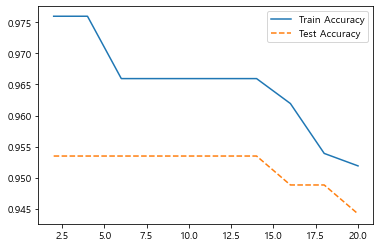

In [161]:
# 정확도를 그래프로 표현
plt.plot(para_leaf, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_leaf, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.legend()

In [165]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# min_samples_split: 분할하기 위한 노드의 최소 샘플 수 
para_split = [n_split * 10 for n_split in range(1, 11)]

for min_samples_split in para_split:
    tree = DecisionTreeClassifier(min_samples_split=min_samples_split, min_samples_leaf = 4, max_depth = 4, random_state=1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesSplit"] = para_split
df_accuracy_split["TrainAccuracy"] = train_accuracy
df_accuracy_split["TestAccuracy"] = test_accuracy
df_accuracy_split.round(3)

,MinSamplesSplit,TrainAccuracy,TestAccuracy
0,10,0.976,0.953
1,20,0.976,0.953
2,30,0.976,0.953
3,40,0.976,0.953
4,50,0.976,0.953
5,60,0.976,0.953
6,70,0.976,0.953
7,80,0.976,0.953
8,90,0.976,0.953
9,100,0.976,0.953


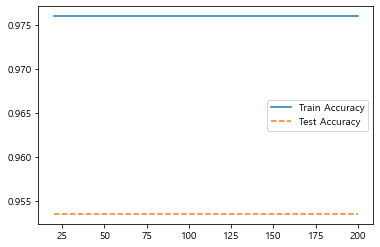

In [164]:
plt.plot(para_split, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_split, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.legend()

In [168]:
tree_final = DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 4,min_samples_split=30, random_state=1234)
tree_final.fit(df_train_x, df_train_y)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=4, min_samples_split=30,
                       random_state=1234)

In [346]:
# 평가
y_pred = tree_final.predict(df_test_x)
print("Accuracy: {0:.3f}\n".format(tree_final.score(df_test_x, df_test_y)))
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

# 목표변수의 빈도 불균형 : f1 score로 모델 평가 
print(classification_report(df_test_y, y_pred, digits=3))

Accuracy: 0.962

Confusion matrix: 
[[ 84  11]
 [  0 191]]
              precision    recall  f1-score   support

          불량      1.000     0.884     0.939        95
          양품      0.946     1.000     0.972       191

    accuracy                          0.962       286
   macro avg      0.973     0.942     0.955       286
weighted avg      0.964     0.962     0.961       286



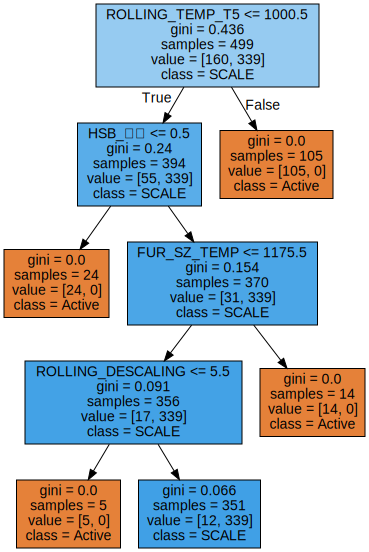

In [178]:
feature_names = df_train_x.columns
export_graphviz(tree_final, out_file="tree.dot", class_names = ["Active","SCALE"],
                feature_names = feature_names, impurity = True, filled = True)
# tree_final.dot 그리기
with open("tree.dot",encoding = 'utf-8') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [179]:
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = feature_names
df_importance["Importance"] = tree_final.feature_importances_

# ds_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
10,ROLLING_TEMP_T5,0.632
95,HSB_적용,0.195
6,FUR_SZ_TEMP,0.126
11,ROLLING_DESCALING,0.047
0,PT_THICK,0.000
...,...,...
33,SPEC_COMMON,0.000
32,SPEC_CCS-B,0.000
31,SPEC_BV-EH36-TM,0.000
30,SPEC_BV-EH32-TM,0.000


Text(0, 0.5, '설명변수')

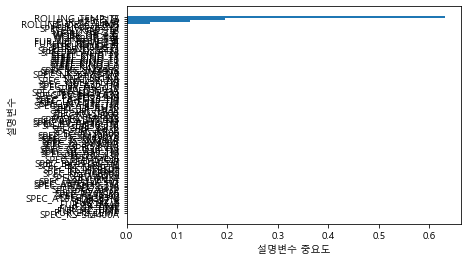

In [180]:
# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림. 
df_importance.sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")


# 랜덤 포레스트

In [340]:
#분류 Random Forest
from sklearn.ensemble import RandomForestClassifier

In [187]:
print(df.value_counts(["SCALE"]))
#보기쉽게 비율로도 확인!~
print("SCALE=정상 비율  ", df.value_counts(df["SCALE"]=="양품")/len(df))

SCALE
양품       483
불량       231
dtype: int64
SCALE=정상 비율   SCALE
True     0.676471
False    0.323529
dtype: float64


In [197]:
df_train_y

,SCALE
209,불량
60,불량
13,양품
152,불량
488,양품
...,...
670,양품
375,양품
207,불량
54,양품


In [188]:
rf_uncustomized = RandomForestClassifier(random_state=1234)
rf_uncustomized.fit(df_train_x, df_train_y)

print("Accuracy on training set: {:.3f}".format(rf_uncustomized.score(df_train_x, df_train_y)))
print("Accuracy on test set: {:.3f}".format(rf_uncustomized.score(df_test_x, df_test_y)))
#test set 성능도 잘나온다. 모델의 복작도를 줄이고, test성능을 최대한 높이고자 모델링을 해보자!
print(df_train_x.shape)
print(df_train_y.shape)

<ipython-input-188-5fd42e606a2d>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_uncustomized.fit(df_train_x, df_train_y)


Accuracy on training set: 1.000
Accuracy on test set: 0.940
(499, 100)
(499, 1)


In [189]:
# 트리의 개수, 트리의 깊이, 잎사귀노드의 최소 자료수, 분리노드의 최소 샘플수 순서로 모델링 시작!

train_accuracy = []; test_accuracy = []
para_n_tree = [n_tree * 10 for n_tree in range(1, 16)]

for v_n_estimators in para_n_tree:
    rf = RandomForestClassifier(n_estimators = v_n_estimators, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))

df_accuracy_n = pd.DataFrame()
df_accuracy_n["n_estimators"] = para_n_tree
df_accuracy_n["TrainAccuracy"] = train_accuracy
df_accuracy_n["TestAccuracy"] = test_accuracy

df_accuracy_n.round(3)

<ipython-input-189-afa261627b64>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(df_train_x, df_train_y)
<ipython-input-189-afa261627b64>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(df_train_x, df_train_y)
<ipython-input-189-afa261627b64>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(df_train_x, df_train_y)
<ipython-input-189-afa261627b64>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(df_train_x, df_train_y)
<ipython-input-189-afa261627b64>:8: DataConversionWarning: A column-vector y was passed when a 1d array 

,n_estimators,TrainAccuracy,TestAccuracy
0,10,0.998,0.916
1,20,0.998,0.921
2,30,1.000,0.926
3,40,1.000,0.935
4,50,1.000,0.944
5,60,1.000,0.940
6,70,1.000,0.935
7,80,1.000,0.944
8,90,1.000,0.935
9,100,1.000,0.940


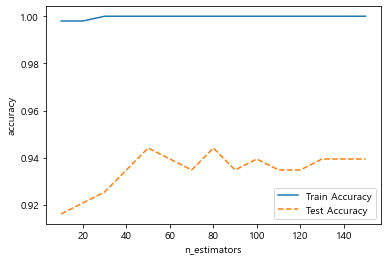

In [190]:
# 트리 깊이에 따른 성능 비교 시각화
plt.plot(para_n_tree, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_n_tree, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy")
plt.xlabel("n_estimators")
plt.legend()

In [191]:
# 트리의 개수에 따른 oob error 변화
oob_error = []

for v_n_estimator in range(1, 151):
    rf = RandomForestClassifier(n_estimators = v_n_estimator, oob_score = True, random_state= 1234)
    rf.fit(df_train_x, df_train_y)
    oob_error.append((1 - rf.oob_score_).round(3))

<ipython-input-191-d0674315ceac>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(df_train_x, df_train_y)
C:\Users\pyund\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
<ipython-input-191-d0674315ceac>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(df_train_x, df_train_y)
C:\Users\pyund\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
<ipython-input-191-d0674315ceac>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

<ipython-input-191-d0674315ceac>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(df_train_x, df_train_y)
<ipython-input-191-d0674315ceac>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(df_train_x, df_train_y)
<ipython-input-191-d0674315ceac>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(df_train_x, df_train_y)
<ipython-input-191-d0674315ceac>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(df_train_x, df_train_y)
<ipython-input-191-d0674315ceac>:6: DataConversionWarning: A column-vector y was passed when a 1d array 

<ipython-input-191-d0674315ceac>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(df_train_x, df_train_y)
<ipython-input-191-d0674315ceac>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(df_train_x, df_train_y)
<ipython-input-191-d0674315ceac>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(df_train_x, df_train_y)
<ipython-input-191-d0674315ceac>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(df_train_x, df_train_y)
<ipython-input-191-d0674315ceac>:6: DataConversionWarning: A column-vector y was passed when a 1d array 

<ipython-input-191-d0674315ceac>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(df_train_x, df_train_y)
<ipython-input-191-d0674315ceac>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(df_train_x, df_train_y)
<ipython-input-191-d0674315ceac>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(df_train_x, df_train_y)
<ipython-input-191-d0674315ceac>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(df_train_x, df_train_y)
<ipython-input-191-d0674315ceac>:6: DataConversionWarning: A column-vector y was passed when a 1d array 

<ipython-input-191-d0674315ceac>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(df_train_x, df_train_y)
<ipython-input-191-d0674315ceac>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(df_train_x, df_train_y)
<ipython-input-191-d0674315ceac>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(df_train_x, df_train_y)
<ipython-input-191-d0674315ceac>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(df_train_x, df_train_y)
<ipython-input-191-d0674315ceac>:6: DataConversionWarning: A column-vector y was passed when a 1d array 

Text(0.5, 0, 'n_estimators')

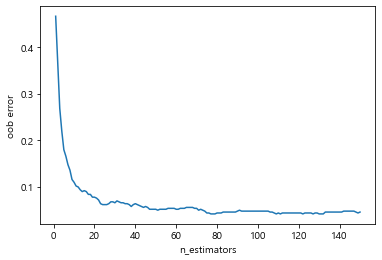

In [192]:
# 그래프로 표현
plt.plot(range(1, 151), oob_error)
plt.ylabel("oob error")
plt.xlabel("n_estimators")


In [200]:
#최대 깊이 변경에 따른 정확도 변화

train_accuracy = []; test_accuracy = []
# max_depth: 최대 깊이 변경
para_depth = [depth for depth in range(1, 15)]

for v_max_depth in para_depth:
    rf = RandomForestClassifier(max_depth = v_max_depth, n_estimators = 80, random_state=1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["TestAccuracy"] = test_accuracy

# 테이블 결과
df_accuracy_depth.round(3)

<ipython-input-200-bc56d63d8180>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(df_train_x, df_train_y)
<ipython-input-200-bc56d63d8180>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(df_train_x, df_train_y)
<ipython-input-200-bc56d63d8180>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(df_train_x, df_train_y)
<ipython-input-200-bc56d63d8180>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(df_train_x, df_train_y)
<ipython-input-200-bc56d63d8180>:9: DataConversionWarning: A column-vector y was passed when a 1d array 

,Depth,TrainAccuracy,TestAccuracy
0,1,0.721,0.679
1,2,0.876,0.805
2,3,0.928,0.907
3,4,0.940,0.912
4,5,0.962,0.935
5,6,0.966,0.935
6,7,0.970,0.935
7,8,0.982,0.935
8,9,0.988,0.940
9,10,0.994,0.935


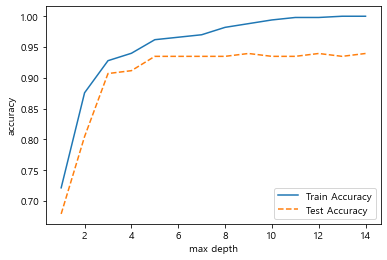

In [201]:
plt.plot(para_depth, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_depth, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.xlabel("max depth"); plt.ylabel("accuracy")
plt.legend()

In [204]:
train_accuracy = []; test_accuracy = []

para_leaf = [n_leaf * 2 for n_leaf in range(1, 11)]

for v_min_samples_leaf in para_leaf:
    rf = RandomForestClassifier(min_samples_leaf = v_min_samples_leaf,
                                max_depth = 12, n_estimators = 80, random_state=1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))

df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf["MinSamplesLeaf"] = para_leaf
df_accuracy_leaf["TrainAccuracy"] = train_accuracy
df_accuracy_leaf["TestAccuracy"] = test_accuracy

df_accuracy_leaf.round(3)

<ipython-input-204-e38f8e0b8834>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(df_train_x, df_train_y)
<ipython-input-204-e38f8e0b8834>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(df_train_x, df_train_y)
<ipython-input-204-e38f8e0b8834>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(df_train_x, df_train_y)
<ipython-input-204-e38f8e0b8834>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(df_train_x, df_train_y)
<ipython-input-204-e38f8e0b8834>:8: DataConversionWarning: A column-vector y was passed when a 1d array 

,MinSamplesLeaf,TrainAccuracy,TestAccuracy
0,2,0.980,0.930
1,4,0.968,0.907
2,6,0.958,0.893
3,8,0.950,0.884
4,10,0.936,0.888
5,12,0.930,0.888
6,14,0.930,0.888
7,16,0.912,0.884
8,18,0.888,0.874
9,20,0.884,0.865


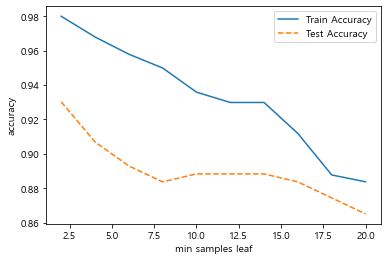

In [205]:
plt.plot(para_leaf, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_leaf, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.xlabel("min samples leaf"); plt.ylabel("accuracy")
plt.legend()

In [206]:
train_accuracy = []; test_accuracy = []

para_split = [n_split *2 for n_split in range(1, 20)]

for v_min_samples_split in para_split:
    rf = RandomForestClassifier(min_samples_split = v_min_samples_split,
                                min_samples_leaf = 2, max_depth = 12, n_estimators = 80, random_state=1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))

df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesSplit"] = para_split
df_accuracy_split["TrainAccuracy"] = train_accuracy
df_accuracy_split["TestAccuracy"] = test_accuracy

df_accuracy_split.round(3)

<ipython-input-206-8c44095b74f9>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(df_train_x, df_train_y)
<ipython-input-206-8c44095b74f9>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(df_train_x, df_train_y)
<ipython-input-206-8c44095b74f9>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(df_train_x, df_train_y)
<ipython-input-206-8c44095b74f9>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(df_train_x, df_train_y)
<ipython-input-206-8c44095b74f9>:8: DataConversionWarning: A column-vector y was passed when a 1d array 

,MinSamplesSplit,TrainAccuracy,TestAccuracy
0,2,0.980,0.930
1,4,0.980,0.930
2,6,0.974,0.940
3,8,0.976,0.944
4,10,0.972,0.935
5,12,0.970,0.926
6,14,0.970,0.930
7,16,0.968,0.926
8,18,0.968,0.930
9,20,0.970,0.930


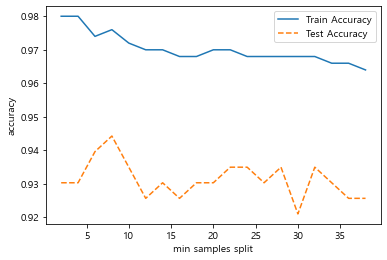

In [207]:
plt.plot(para_split, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_split, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.xlabel("min samples split"); plt.ylabel("accuracy")
plt.legend()


In [208]:
rf_final = RandomForestClassifier(min_samples_leaf = 2, min_samples_split = 8, max_depth = 12, n_estimators = 80, random_state=1234)
rf_final.fit(df_train_x, df_train_y)
# 평가
y_pred = rf_final.predict(df_test_x)

print("Accuracy on training set: {:.3f}".format(rf_final.score(df_train_x, df_train_y)))
print("Accuracy on test set: {:.3f}\n".format(rf_final.score(df_test_x, df_test_y)))


Accuracy on training set: 0.976
Accuracy on test set: 0.944



<ipython-input-208-45f9d4caa7d2>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_final.fit(df_train_x, df_train_y)


In [209]:
y_pred = rf_final.predict(df_test_x)
print("Accuracy: {0:.3f}\n".format(rf_final.score(df_test_x, df_test_y)))
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))
# 목표변수의 빈도 불균형 : f1 score로 모델 평가 
print(classification_report(df_test_y, y_pred, digits=3))

Accuracy: 0.944

Confusion matrix: 
[[ 59  12]
 [  0 144]]
              precision    recall  f1-score   support

          불량      1.000     0.831     0.908        71
          양품      0.923     1.000     0.960       144

    accuracy                          0.944       215
   macro avg      0.962     0.915     0.934       215
weighted avg      0.948     0.944     0.943       215



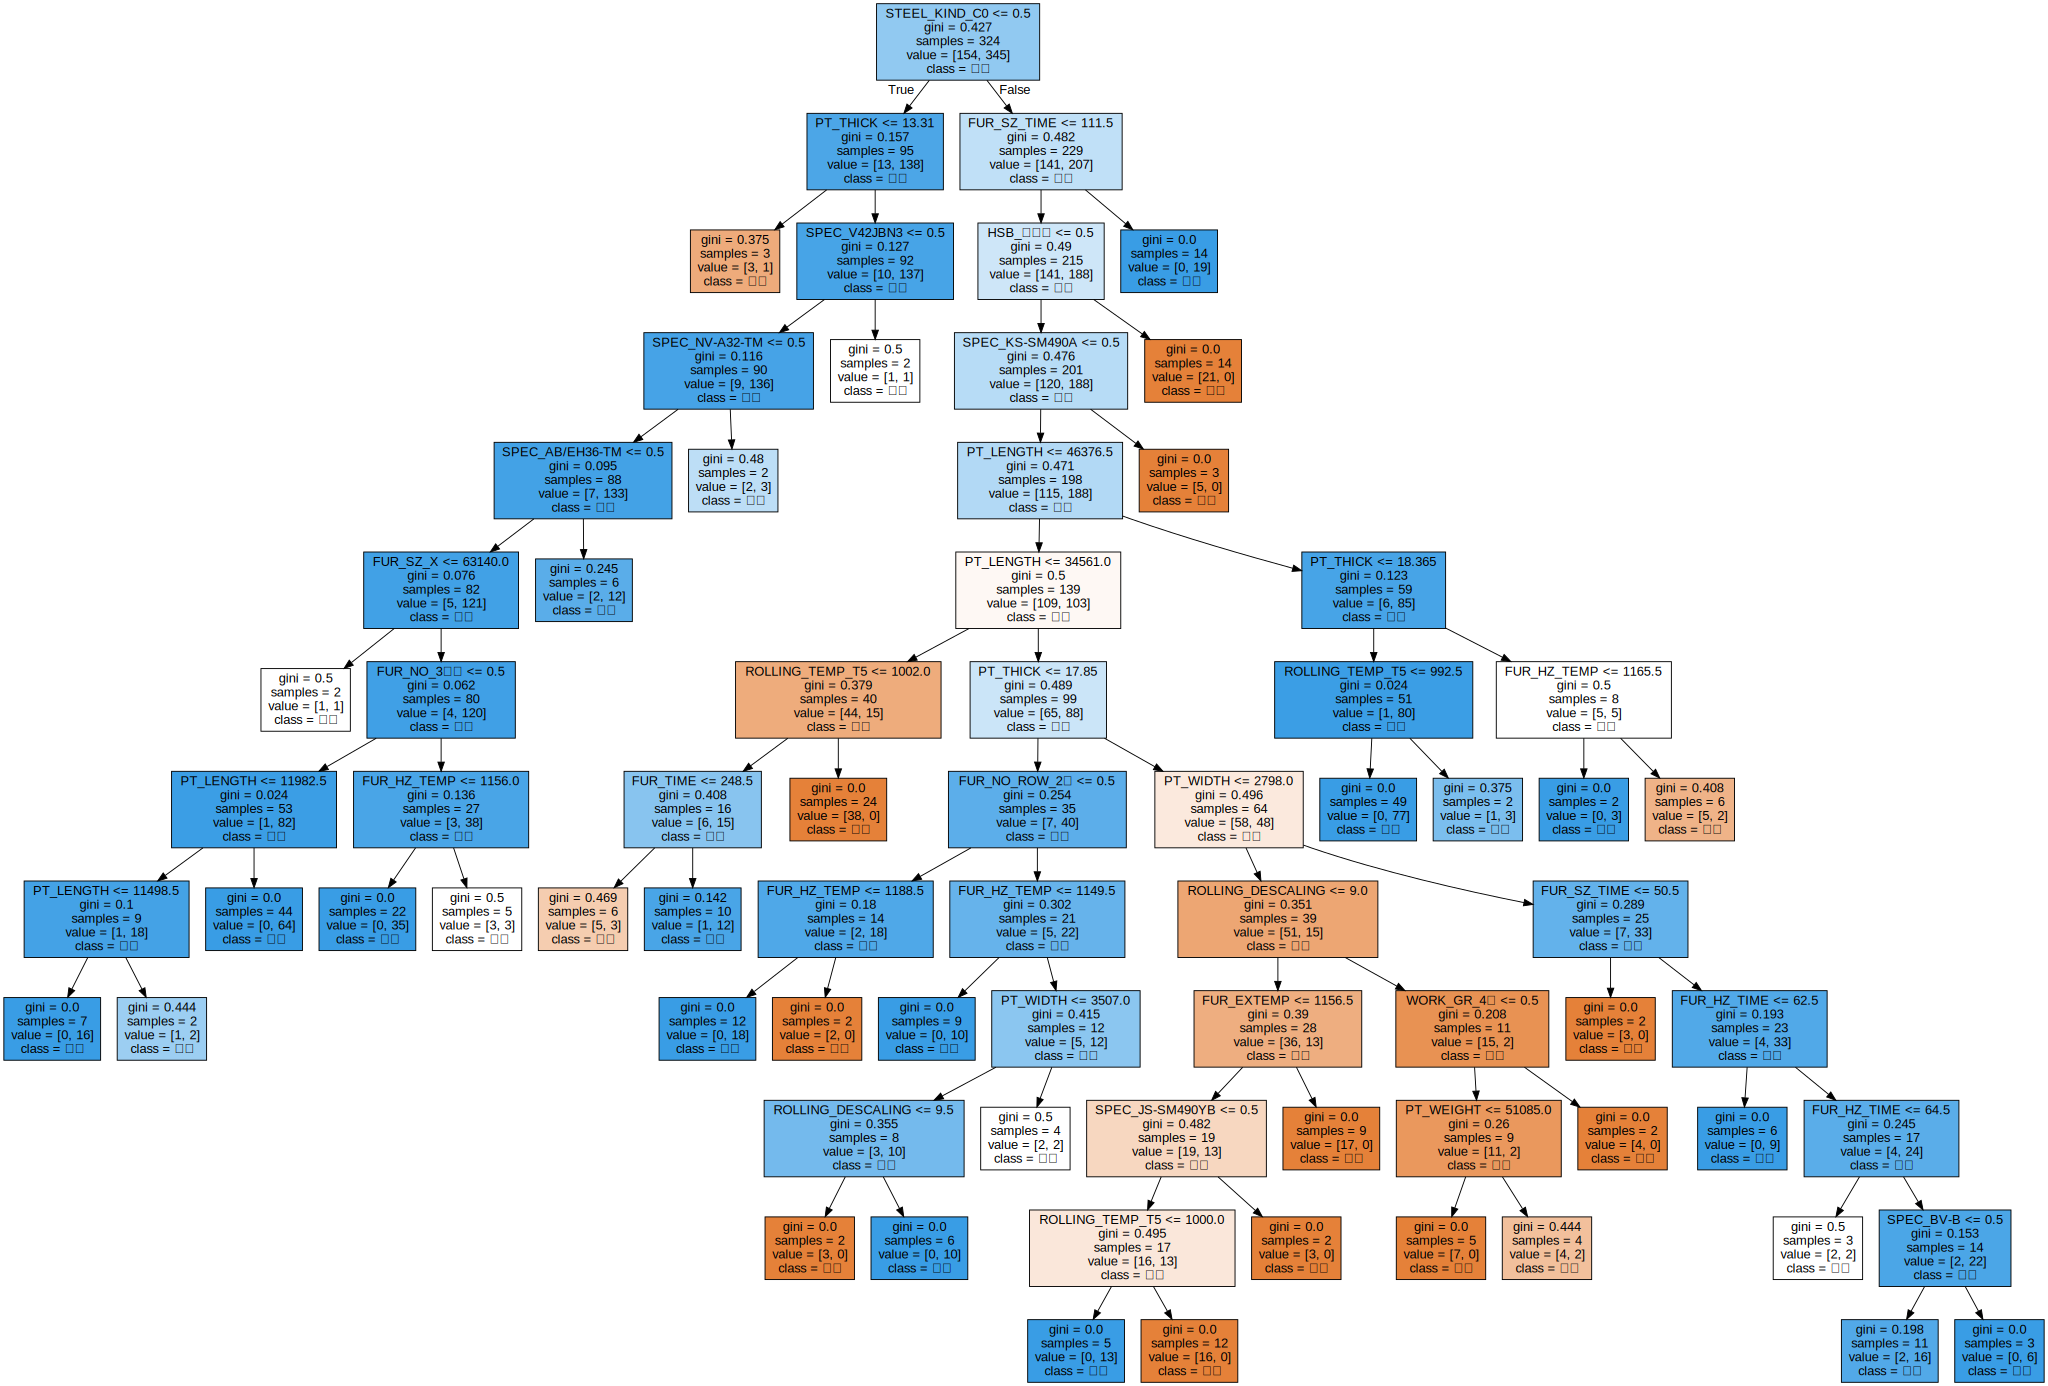

In [210]:
export_graphviz(rf_final.estimators_[1], out_file="rfc_fin_1.dot", class_names = ['불량','양품'],
                feature_names = feature_names, impurity = True, filled = True)
with open("rfc_fin_1.dot", encoding= 'UTF8') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [211]:
# 변수명
feature_names = df_train_x.columns

# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = feature_names
df_importance["Importance"] = rf_final.feature_importances_

# ds_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
10,ROLLING_TEMP_T5,0.284
6,FUR_SZ_TEMP,0.070
1,PT_WIDTH,0.062
0,PT_THICK,0.060
9,FUR_EXTEMP,0.058
...,...,...
72,SPEC_NV-B,0.000
71,SPEC_NV-A36-TM,0.000
62,SPEC_LR-EH32-TM,0.000
63,SPEC_LR-EH36-TM,0.000


Text(0, 0.5, '설명변수')

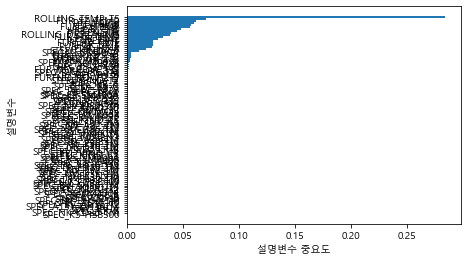

In [212]:
df_importance.sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_importance ))
plt.barh(y = coordinates, width = df_importance ["Importance"])
plt.yticks(coordinates, df_importance ["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")

# 그래디언트 부스팅


In [341]:
# 분류 Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

In [215]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_dummy, # 설명변수 데이터
                                                                df_raw_y, # 목표변수 데이터
                                                                test_size = 0.3, # test 데이터의 비율
                                                                random_state = 1234) 

In [216]:
# 그래디언트 부스팅 모델 생성: GradientBoostingClassifier
gb_uncustomized = GradientBoostingClassifier(random_state=1234)
gb_uncustomized.fit(df_train_x, df_train_y)
# train 데이터 셋 정확도
print("Accuracy on train set: {:.3f}".format(gb_uncustomized.score (df_train_x, df_train_y)))
# test 데이터 셋 정확도
print("Accuracy on test set: {:.3f}".format(gb_uncustomized.score (df_test_x, df_test_y)))

C:\Users\pyund\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy on train set: 1.000
Accuracy on test set: 0.958


In [219]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# n_estimatos: 트리 수 변경: 10~150
para_n_tree = [n_tree * 10 for n_tree in range(1, 18)]

for v_n_estimators in para_n_tree:
    gb = GradientBoostingClassifier(n_estimators = v_n_estimators, random_state = 1234)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_n = pd.DataFrame()
df_accuracy_n["Estimators"] = para_n_tree
df_accuracy_n["TrainAccuracy"] = train_accuracy
df_accuracy_n["TestAccuracy"] = test_accuracy

# n_estimators별 정확도 테이블
df_accuracy_n.round(3)

C:\Users\pyund\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pyund\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pyund\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pyund\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

,Estimators,TrainAccuracy,TestAccuracy
0,10,0.966,0.953
1,20,0.976,0.953
2,30,0.980,0.953
3,40,0.984,0.953
4,50,0.992,0.958
5,60,0.996,0.958
6,70,0.998,0.958
7,80,0.998,0.958
8,90,1.000,0.958
9,100,1.000,0.958


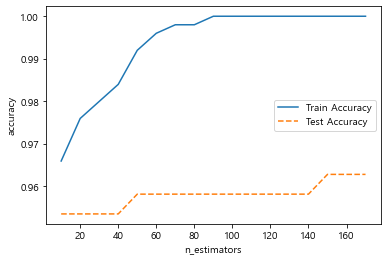

In [220]:
# 정확도를 그래프로 표현
plt.plot(para_n_tree, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_n_tree, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("n_estimators")
plt.legend()

In [221]:
train_accuracy = []; test_accuracy = []
# learning_rate 학습률 변경: 0.1 ~ 0.9
para_lr = [lr * 0.1 for lr in range(1, 10)]

for v_learning_rate in para_lr:
    gb = GradientBoostingClassifier(learning_rate = v_learning_rate, n_estimators = 150, random_state = 1234)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_lr = pd.DataFrame()
df_accuracy_lr["LearningRate"] = para_lr
df_accuracy_lr["TrainAccuracy"] = train_accuracy
df_accuracy_lr["TestAccuracy"] = test_accuracy

# LearningRate별 정확도 테이블
df_accuracy_lr.round(3)

C:\Users\pyund\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pyund\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pyund\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pyund\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

,LearningRate,TrainAccuracy,TestAccuracy
0,0.1,1.0,0.963
1,0.2,1.0,0.972
2,0.3,1.0,0.981
3,0.4,1.0,0.967
4,0.5,1.0,0.963
5,0.6,1.0,0.953
6,0.7,1.0,0.958
7,0.8,1.0,0.958
8,0.9,1.0,0.940


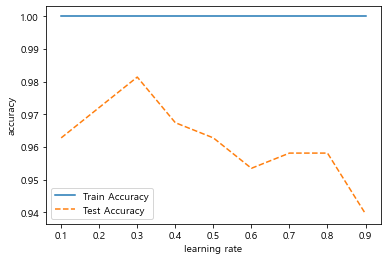

In [222]:
# LearningRate별 정확도 그래프로 확인
plt.plot(para_lr, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_lr, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("learning rate")
plt.legend()

In [223]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# max_depth: 최대 깊이 변경
para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    gb = GradientBoostingClassifier(max_depth = v_max_depth,
                                    n_estimators = 150, learning_rate = 0.3,random_state=1234)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["TestAccuracy"] = test_accuracy

# max_depth별 정확도 테이블
df_accuracy_depth.round(3)

C:\Users\pyund\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pyund\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pyund\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pyund\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

,Depth,TrainAccuracy,TestAccuracy
0,1,0.998,0.958
1,2,1.000,0.977
2,3,1.000,0.981
3,4,1.000,0.958
4,5,1.000,0.953
5,6,1.000,0.963
6,7,1.000,0.981
7,8,1.000,0.986
8,9,1.000,0.963
9,10,1.000,0.981


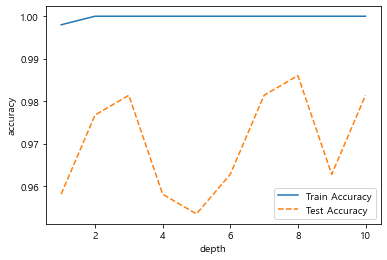

In [224]:
# 정확도를 그래프로 표현
plt.plot(para_depth, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_depth, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("depth")
plt.legend()

In [225]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# min_samples_leaf: 잎사귀 수 제한
para_leaf = [n_leaf * 10 for n_leaf in range(1, 11)]

for v_min_samples_leaf in para_leaf:
    gb = GradientBoostingClassifier(min_samples_leaf = v_min_samples_leaf,
                                     max_depth = 8, n_estimators = 150, learning_rate = 0.3, random_state=1234)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf["MinSamplesLeaf"] = para_leaf
df_accuracy_leaf["TrainAccuracy"] = train_accuracy
df_accuracy_leaf["TestAccuracy"] = test_accuracy

# min_samples_leaf별 정확도 테이블
df_accuracy_leaf.round(3)

C:\Users\pyund\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pyund\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pyund\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pyund\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

,MinSamplesLeaf,TrainAccuracy,TestAccuracy
0,10,1.000,0.991
1,20,1.000,0.963
2,30,1.000,0.874
3,40,1.000,0.865
4,50,1.000,0.865
5,60,1.000,0.856
6,70,1.000,0.879
7,80,0.998,0.879
8,90,0.988,0.893
9,100,0.978,0.884


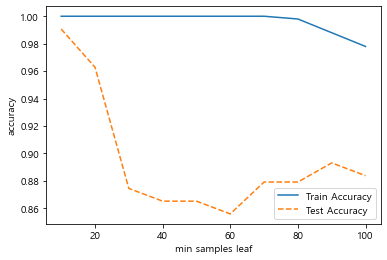

In [226]:
# 정확도를 그래프로 표현
plt.plot(para_leaf, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_leaf, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("min samples leaf")
plt.legend()

In [227]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# min_samples_split: 분할하기 위한 노드의 최소 샘플 수 
para_split = [n_split * 10 for n_split in range(2, 11)]

for v_min_samples_split in para_split:
    gb = GradientBoostingClassifier(min_samples_split = v_min_samples_split, min_samples_leaf = 10,
                                    max_depth = 8,n_estimators = 150, learning_rate = 0.3, random_state=1234)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesSplit"] = para_split
df_accuracy_split["TrainAccuracy"] = train_accuracy
df_accuracy_split["TestAccuracy"] = test_accuracy

# min_samples_leaf별 정확도 테이블
df_accuracy_split.round(3)

C:\Users\pyund\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pyund\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pyund\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pyund\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

,MinSamplesSplit,TrainAccuracy,TestAccuracy
0,20,1.0,0.991
1,30,1.0,0.986
2,40,1.0,0.991
3,50,1.0,0.991
4,60,1.0,0.991
5,70,1.0,0.995
6,80,1.0,0.995
7,90,1.0,0.995
8,100,1.0,0.995


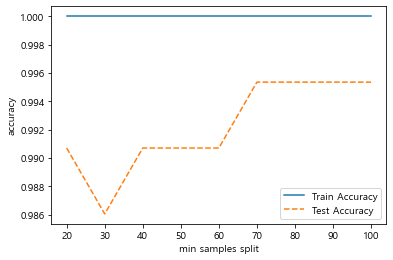

In [228]:
# 정확도를 그래프로 표현
plt.plot(para_split, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_split, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("min samples split")
plt.legend()

In [231]:
# 최종 모델
gb_final = GradientBoostingClassifier(min_samples_leaf = 10,min_samples_split=70, max_depth = 8, n_estimators = 150,
                                      learning_rate = 0.3, random_state=1234)
gb_final.fit(df_train_x, df_train_y)
# 예측
y_pred = gb_final.predict(df_test_x)

# train 데이터 셋 정확도
print("Accuracy on training set: {:.3f}".format(gb_final.score(df_train_x, df_train_y)))
# test 데이터 셋 정확도
print("Accuracy on test set: {:.3f}\n".format(gb_final.score(df_test_x, df_test_y)))
# confusion matrix
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

# 목표변수의 빈도 불균형 : f1 score로 모델 평가 
print(classification_report(df_test_y, y_pred, digits=3))

C:\Users\pyund\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy on training set: 1.000
Accuracy on test set: 0.995

Confusion matrix: 
[[ 71   0]
 [  1 143]]
              precision    recall  f1-score   support

          불량      0.986     1.000     0.993        71
          양품      1.000     0.993     0.997       144

    accuracy                          0.995       215
   macro avg      0.993     0.997     0.995       215
weighted avg      0.995     0.995     0.995       215



In [251]:
v_feature_names = df_train_x.columns
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance ["Feature"] = v_feature_names
df_importance ["Importance"] = gb_final.feature_importances_
# df_feature_importance의 테이블을 중요도별로 정렬
df_importance .sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
10,ROLLING_TEMP_T5,0.599
6,FUR_SZ_TEMP,0.130
95,HSB_적용,0.104
94,HSB_미적용,0.078
0,PT_THICK,0.038
...,...,...
41,SPEC_JS-SM400A,0.000
40,SPEC_GL-E36-TM,0.000
39,SPEC_GL-E32-TM,0.000
38,SPEC_GL-D36-TM,0.000


# SVM

In [233]:
# 분류 SVM
from sklearn.svm import SVC

In [234]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_dummy, # 설명변수 데이터
                                                                df_raw_y, # 목표변수 데이터
                                                                test_size = 0.3, # test 데이터의 비율
                                                                random_state = 1234) 

In [235]:
svm_uncustomized = SVC(random_state=1234)
svm_uncustomized.fit(df_train_x, df_train_y)
# train 데이터 셋 정확도
print("Accuracy on train set: {:.3f}".format(svm_uncustomized.score(df_train_x, df_train_y)))
# test 데이터 셋 정확도
print("Accuracy on test set: {:.3f}".format(svm_uncustomized.score(df_test_x, df_test_y)))
y_pred = svm_uncustomized.predict(df_test_x)
# confusion matrix
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

print(classification_report(df_test_y, y_pred, digits=3))

Accuracy on train set: 0.699
Accuracy on test set: 0.684
Confusion matrix: 
[[  6  65]
 [  3 141]]
              precision    recall  f1-score   support

          불량      0.667     0.085     0.150        71
          양품      0.684     0.979     0.806       144

    accuracy                          0.684       215
   macro avg      0.676     0.532     0.478       215
weighted avg      0.679     0.684     0.589       215



C:\Users\pyund\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [236]:
#C(cost) 값에 따른 성능 비교

train_accuracy = []; test_accuracy = []
# c: 규제(0.01, 0.1, 1, 10)
para_c = [10 **c for c in range(-2, 3)]

for v_C in para_c:
    svm = SVC(C = v_C, random_state = 1234)
    svm.fit(df_train_x, df_train_y)
    train_accuracy.append(svm.score(df_train_x, df_train_y))
    test_accuracy.append(svm.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_c = pd.DataFrame()
df_accuracy_c["C"] = para_c
df_accuracy_c["TrainAccuracy"] = train_accuracy
df_accuracy_c["TestAccuracy"] = test_accuracy

# C별 정확도 테이블
df_accuracy_c.round(3)

C:\Users\pyund\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pyund\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pyund\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pyund\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

,C,TrainAccuracy,TestAccuracy
0,0.01,0.679,0.670
1,0.10,0.679,0.670
2,1.00,0.699,0.684
3,10.00,0.701,0.693
4,100.00,0.782,0.716


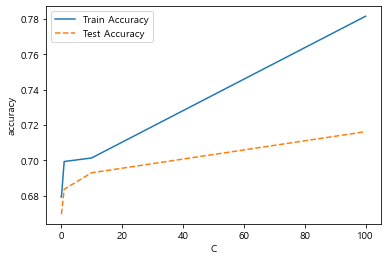

In [237]:
# 정확도를 그래프로 표현
plt.plot(para_c, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_c, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("C")
plt.legend()


In [242]:
# G(gamma)깂에 따른 성능 비교
train_accuracy = []; test_accuracy = []
para_gamma = [10 **gamma for gamma in range(-15, 1)]

for v_gamma in para_gamma:
    svm = SVC(gamma = v_gamma, C = 20, random_state = 1234)
    svm.fit(df_train_x, df_train_y)
    train_accuracy.append(svm.score(df_train_x, df_train_y))
    test_accuracy.append(svm.score(df_test_x, df_test_y))

df_accuracy_gamma = pd.DataFrame()
df_accuracy_gamma["gamma"] = para_gamma
df_accuracy_gamma["TrainAccuracy"] = train_accuracy
df_accuracy_gamma["TestAccuracy"] = test_accuracy

df_accuracy_gamma.round(4)

C:\Users\pyund\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pyund\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pyund\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pyund\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

,gamma,TrainAccuracy,TestAccuracy
0,0.0000,0.6794,0.6698
1,0.0000,0.6794,0.6698
2,0.0000,0.6794,0.6698
3,0.0000,0.6794,0.6698
4,0.0000,0.6974,0.6837
5,0.0000,0.7776,0.7070
6,0.0000,0.8838,0.7023
7,0.0000,0.9960,0.7070
8,0.0000,1.0000,0.6651
9,0.0000,1.0000,0.6651


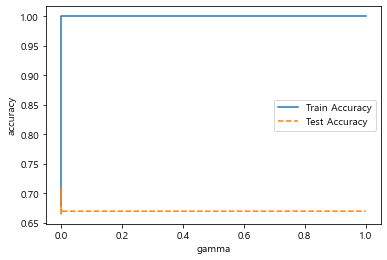

In [243]:
# 정확도를 그래프로 표현
plt.plot(para_gamma, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_gamma, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("gamma")
plt.legend()

#감마의 값이 0.001이후부터 test data에 대한 성능이 급격히 감소한다.
#train data에 대한 성능은 0.001부터 1로 수렴했다

In [322]:
# 최종 모델
svc_final = SVC(gamma = 0.0000000001, C = 20, random_state=1234)
svc_final.fit(df_train_x, df_train_y)
# 평가
y_pred = svc_final.predict(df_test_x)

# train 데이터 셋 정확도
print("Accucary on training set: {:.3f}".format(svc_final.score(df_train_x, df_train_y)))
# test 데이터 셋 정확도
print("Accuracy on test set: {:.3f}\n".format(svc_final.score(df_test_x, df_test_y)))
# confusion matrix
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

# 목표변수의 빈도 불균형 : f1 score로 모델 평가 
print(classification_report(df_test_y, y_pred, digits=3))

Accucary on training set: 0.797
Accuracy on test set: 0.734

Confusion matrix: 
[[ 42  53]
 [ 23 168]]
              precision    recall  f1-score   support

          불량      0.646     0.442     0.525        95
          양품      0.760     0.880     0.816       191

    accuracy                          0.734       286
   macro avg      0.703     0.661     0.670       286
weighted avg      0.722     0.734     0.719       286



C:\Users\pyund\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# 인공신경망

In [342]:
# 분류 NN (MLPClassifier)
from sklearn.neural_network import MLPClassifier

In [255]:
df_train_x, df_test_x, df_train_y, df_test_y= train_test_split(df_raw_dummy, df_raw_y, test_size = 0.4,random_state = 1234)
print("train data X size : {}".format(df_train_x.shape))
print("test data X size : {}".format(df_test_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (428, 100)
test data X size : (286, 100)
train data Y size : (428, 1)
test data Y size : (286, 1)


In [256]:
nn_uncustomized = MLPClassifier(random_state=1234)
nn_uncustomized.fit(df_train_x, df_train_y)

exy_pred = nn_uncustomized.predict(df_test_x)
# train 데이터 셋 정확도
print("Accuracy on training set: {:.3f}".format(nn_uncustomized.score(df_train_x, df_train_y)))
# test 데이터 셋 정확도
print("Accuracy on test set: {:.3f}".format(nn_uncustomized.score(df_test_x, df_test_y)))

print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, exy_pred)))

# 목표변수의 빈도 불균형 : f1 score로 모델 평가 
print(classification_report(df_test_y, exy_pred, digits=3))

Accuracy on training set: 0.661
Accuracy on test set: 0.692
Confusion matrix: 
[[ 21  74]
 [ 14 177]]
              precision    recall  f1-score   support

          불량      0.600     0.221     0.323        95
          양품      0.705     0.927     0.801       191

    accuracy                          0.692       286
   macro avg      0.653     0.574     0.562       286
weighted avg      0.670     0.692     0.642       286



C:\Users\pyund\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [257]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# hidden_layer_sizes: 은닉층 변경 (20~240, by 30)
para_hidden = [20 * hidden for hidden in range(1, 11)]

for v_hidden in para_hidden:
#     nn = MLPClassifier(hidden_layer_sizes = v_hidden, random_state = 1234)
    nn = MLPClassifier(hidden_layer_sizes = (v_hidden,v_hidden), random_state = 1234)    
    nn.fit(df_train_x, df_train_y)
    train_accuracy.append(nn.score(df_train_x, df_train_y))
    test_accuracy.append(nn.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_hidden = pd.DataFrame()
df_accuracy_hidden["HiddenLayer"] = para_hidden
df_accuracy_hidden["TrainAccuracy"] = train_accuracy
df_accuracy_hidden["TestAccuracy"] = test_accuracy

C:\Users\pyund\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pyund\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pyund\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pyund\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y 

In [258]:
# 은닉층별 정확도 테이블 
df_accuracy_hidden.round(3)

,HiddenLayer,TrainAccuracy,TestAccuracy
0,20,0.533,0.563
1,40,0.657,0.608
2,60,0.682,0.615
3,80,0.703,0.664
4,100,0.771,0.696
5,120,0.551,0.503
6,140,0.757,0.710
7,160,0.762,0.696
8,180,0.689,0.671
9,200,0.762,0.689


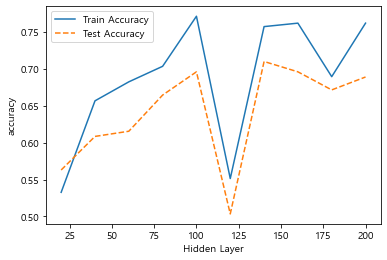

In [259]:
plt.plot(para_hidden, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_hidden, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("Hidden Layer")
plt.legend()
plt.show()

In [260]:
# 은닉층 지정(임의)
hidden_layer_sizes = 140

In [261]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# activation 변경 
para_function = ["logistic", "tanh", "relu"]

for v_function in para_function:
    nn = MLPClassifier(activation = v_function, hidden_layer_sizes = (140,140), random_state = 1234)
    nn.fit(df_train_x, df_train_y)
    train_accuracy.append(nn.score(df_train_x, df_train_y))
    test_accuracy.append(nn.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_function = pd.DataFrame()
df_accuracy_function["ActivationFunction"] = para_function
df_accuracy_function["TrainAccuracy"] = train_accuracy
df_accuracy_function["TestAccuracy"] = test_accuracy

C:\Users\pyund\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pyund\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pyund\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [262]:
# Activation Function별 정확도 테이블 
df_accuracy_function.round(3)

,ActivationFunction,TrainAccuracy,TestAccuracy
0,logistic,0.703,0.703
1,tanh,0.724,0.717
2,relu,0.757,0.710


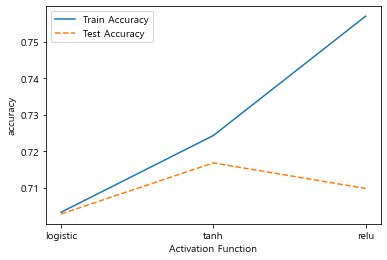

In [263]:
plt.plot(para_function, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_function, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("Activation Function")
plt.legend()
plt.show()
# 렐루레루 가 지다니... Data마다 어울리는 activation function이 있는거 같다.
#요즘은 swish가 대세라던데....

In [264]:
# Activation Function 지정(임의)
activation = "tanh"

In [275]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# solver 변경 
para_solver = ["lbfgs", "sgd", "adam"]

for v_solver in para_solver:
    nn = MLPClassifier(solver = v_solver, activation = "tanh", hidden_layer_sizes = (140,140), random_state = 1234)
    nn.fit(df_train_x, df_train_y)
    train_accuracy.append(nn.score(df_train_x, df_train_y))
    test_accuracy.append(nn.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_solver = pd.DataFrame()
df_accuracy_solver["Solver"] = para_solver
df_accuracy_solver["TrainAccuracy"] = train_accuracy
df_accuracy_solver["TestAccuracy"] = test_accuracy

C:\Users\pyund\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pyund\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\pyund\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pyund

In [276]:
df_accuracy_solver.round(3)

,Solver,TrainAccuracy,TestAccuracy
0,lbfgs,0.766,0.713
1,sgd,0.755,0.717
2,adam,0.724,0.717


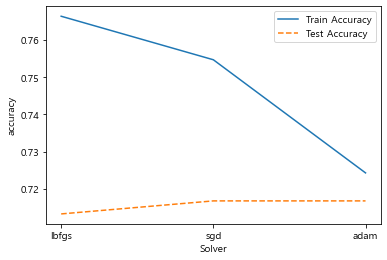

In [277]:
plt.plot(para_solver, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_solver, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("Solver")
plt.legend()
plt.show()
# 요즘은 adam이 짱~!

In [278]:
# Solver 지정(임의)
solver = "adam" 

In [279]:
print("데이터 크기: ", df_train_x.shape)

# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []

# Mini Batch 변경 :
para_batch = [10 * batch for batch in range(1, 12)]

print(para_batch)

데이터 크기:  (428, 100)
[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110]


In [280]:
for v_batch in para_batch:
    nn = MLPClassifier(batch_size = v_batch, solver = "adam", activation = "tanh",
                       hidden_layer_sizes = (140,140), random_state = 1234)
    nn.fit(df_train_x, df_train_y)
    train_accuracy.append(nn.score(df_train_x, df_train_y))
    test_accuracy.append(nn.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_batch = pd.DataFrame()
df_accuracy_batch["Mini Batch"] = para_batch
df_accuracy_batch["TrainAccuracy"] = train_accuracy
df_accuracy_batch["TestAccuracy"] = test_accuracy

C:\Users\pyund\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pyund\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pyund\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pyund\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y 

In [281]:
# Mini Batch Size별 정확도 테이블
df_accuracy_batch.round(3)

,Mini Batch,TrainAccuracy,TestAccuracy
0,10,0.778,0.713
1,20,0.815,0.696
2,30,0.818,0.713
3,40,0.769,0.619
4,50,0.855,0.720
5,60,0.843,0.696
6,70,0.804,0.682
7,80,0.764,0.668
8,90,0.776,0.689
9,100,0.804,0.713


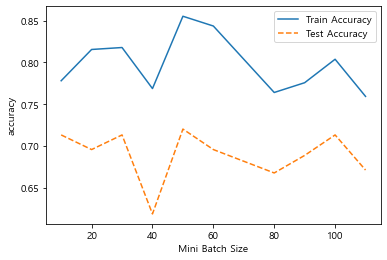

In [282]:
# 정확도 그래프 표현
plt.plot(para_batch, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_batch, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("Mini Batch Size")
plt.legend()
plt.show()

In [285]:
mini_batch_size = 50

In [286]:
nn_final = MLPClassifier(hidden_layer_sizes = (140, 140), activation = "tanh", solver = "adam",
                         batch_size = 50, random_state = 1234)
nn_final.fit(df_train_x, df_train_y)

# 평가
y_pred = nn_final.predict(df_test_x)

# train 데이터 셋 정확도
print("Accucary on training set: {:.3f}".format(nn_final.score(df_train_x, df_train_y)))
# test 데이터 셋 정확도
print("Accuracy on test set: {:.3f}\n".format(nn_final.score(df_test_x, df_test_y)))
# confusion matrix
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

# 목표변수의 빈도 불균형 : f1 score로 모델 평가 
print(classification_report(df_test_y, y_pred, digits=3))

C:\Users\pyund\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accucary on training set: 0.855
Accuracy on test set: 0.720

Confusion matrix: 
[[ 45  50]
 [ 30 161]]
              precision    recall  f1-score   support

          불량      0.600     0.474     0.529        95
          양품      0.763     0.843     0.801       191

    accuracy                          0.720       286
   macro avg      0.682     0.658     0.665       286
weighted avg      0.709     0.720     0.711       286



In [295]:
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [289]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []

para_n_neighbors = [i for i in range(3, 31)]

for v_n_neighbors in para_n_neighbors:
    knn = KNeighborsClassifier(n_neighbors = v_n_neighbors)
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_neighbors = pd.DataFrame()
df_accuracy_neighbors["Neighbors"] = para_n_neighbors
df_accuracy_neighbors["TrainAccuracy"] = train_accuracy
df_accuracy_neighbors["TestAccuracy"] = test_accuracy
df_accuracy_neighbors.round(3)

C:\Users\pyund\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\pyund\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\pyund\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\pyund\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

,Neighbors,TrainAccuracy,TestAccuracy
0,3,0.864,0.713
1,4,0.813,0.682
2,5,0.834,0.710
3,6,0.820,0.696
4,7,0.827,0.682
5,8,0.822,0.675
6,9,0.827,0.671
7,10,0.815,0.678
8,11,0.820,0.671
9,12,0.829,0.682


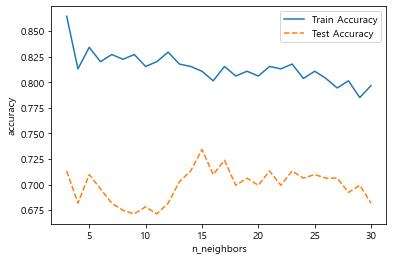

In [290]:
plt.plot(para_n_neighbors, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_n_neighbors, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("n_neighbors")
plt.legend()

In [291]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# 이웃 수
para_n_neighbors = [i for i in range(3,31)]*2
# 가중치(uniform, distance)
para_weights = (["uniform"]) * 28 + (["distance"] * 28)
# zip( list1, list2, …)를 사용하면 list1과 list2의 인덱스별 값을 하나씩 가져옴
# 1번 loop: n_neighbors = para_n_neihtbors[0], weights = para_weights[0]
# 2번 loop: n_neighbors = para_n_neihtbors[1], weights = para_weights[1]
for (v_n_neighbors, v_weights) in zip(para_n_neighbors, para_weights):
    knn = KNeighborsClassifier(n_neighbors = v_n_neighbors, weights = v_weights)
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_test_x, df_test_y))    
# 데이터 테이블로 저장
df_accuracy_weights = pd.DataFrame()
df_accuracy_weights["Neighbors"] = para_n_neighbors
df_accuracy_weights["Weights"] = para_weights
df_accuracy_weights["TrainAccuracy"] = train_accuracy
df_accuracy_weights["TestAccuracy"] = test_accuracy
df_accuracy_weights.round(3)

C:\Users\pyund\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\pyund\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\pyund\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\pyund\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

C:\Users\pyund\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\pyund\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\pyund\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\pyund\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

,Neighbors,Weights,TrainAccuracy,TestAccuracy
0,3,uniform,0.864,0.713
1,4,uniform,0.813,0.682
2,5,uniform,0.834,0.710
3,6,uniform,0.820,0.696
4,7,uniform,0.827,0.682
5,8,uniform,0.822,0.675
6,9,uniform,0.827,0.671
7,10,uniform,0.815,0.678
8,11,uniform,0.820,0.671
9,12,uniform,0.829,0.682


In [292]:
df_accuracy_weights_pivot = df_accuracy_weights.pivot(index = "Neighbors", columns = "Weights",
                                                      values = ["TrainAccuracy", "TestAccuracy"])
df_accuracy_weights_pivot

TrainAccuracy           TestAccuracy          
Weights        distance   uniform     distance   uniform
Neighbors                                               
3                   1.0  0.864486     0.716783  0.713287
4                   1.0  0.813084     0.702797  0.681818
5                   1.0  0.834112     0.706294  0.709790
6                   1.0  0.820093     0.716783  0.695804
7                   1.0  0.827103     0.692308  0.681818
8                   1.0  0.822430     0.692308  0.674825
9                   1.0  0.827103     0.681818  0.671329
10                  1.0  0.815421     0.681818  0.678322
11                  1.0  0.820093     0.688811  0.671329
12                  1.0  0.829439     0.702797  0.681818
13                  1.0  0.817757     0.727273  0.702797
14                  1.0  0.815421     0.730769  0.713287
15                  1.0  0.810748     0.737762  0.734266
16                  1.0  0.801402     0.730769  0.709790
17                  1.0  0.815421     0.737762  0.723776
18                  1.0  0.806075     0.709790  0.699301
19                  1.0  0.810748     0.713287  0.706294
20                  1.0  0.806075     0.709790  0.699301
21                  1.0  0.815421     0.713287  0.713287
22                  1.0  0.813084     0.702797  0.699301
23                  1.0  0.817757     0.713287  0.713287
24                  1.0  0.803738     0.713287  0.706294
25                  1.0  0.810748     0.720280  0.709790
26                  1.0  0.803738     0.713287  0.706294
27                  1.0  0.794393     0.716783  0.706294
28                  1.0  0.801402     0.713287  0.692308
29                  1.0  0.785047     0.709790  0.699301
30                  1.0  0.796729     0.699301  0.681818

In [293]:
level0 = df_accuracy_weights_pivot.columns.get_level_values(0)
level1 = df_accuracy_weights_pivot.columns.get_level_values(1)
df_accuracy_weights_pivot.columns = level0 + "_" + level1
df_accuracy_weights_pivot.head()

,TrainAccuracy_distance,TrainAccuracy_uniform,TestAccuracy_distance,TestAccuracy_uniform
Neighbors,,,,
3,1.0,0.864486,0.716783,0.713287
4,1.0,0.813084,0.702797,0.681818
5,1.0,0.834112,0.706294,0.709790
6,1.0,0.820093,0.716783,0.695804
7,1.0,0.827103,0.692308,0.681818


<AxesSubplot:xlabel='Neighbors'>

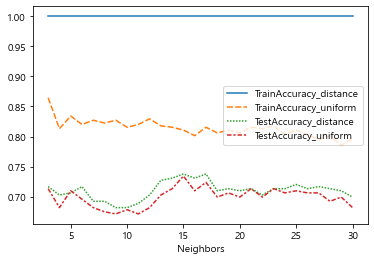

In [296]:
# 그래프 생성. 변수별 linestyle 구분
sns.lineplot(data = df_accuracy_weights_pivot)

In [324]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# 이웃 수
para_n_neighbors = [i for i in range(3,31)] * 3
# 거리 계산 방법 (minkowski, euclidean, manhattan)
para_metric = ["minkowski"] * 28 + ["euclidean"] * 28 + ["manhattan"] * 28

for (v_n_neighbors, v_metric) in zip(para_n_neighbors, para_metric):
    knn = KNeighborsClassifier(n_neighbors = v_n_neighbors, metric = v_metric, weights = "uniform")
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_test_x, df_test_y))    

# 데이터 테이블로 저장
df_accuracy_metric = pd.DataFrame()
df_accuracy_metric["Neighbors"] = para_n_neighbors
df_accuracy_metric["Metric"] = para_metric
df_accuracy_metric["TrainAccuracy"] = train_accuracy
df_accuracy_metric["TestAccuracy"] = test_accuracy
df_accuracy_metric.round(3)

C:\Users\pyund\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\pyund\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\pyund\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\pyund\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

C:\Users\pyund\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\pyund\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\pyund\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\pyund\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

C:\Users\pyund\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\pyund\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\pyund\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\pyund\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

,Neighbors,Metric,TrainAccuracy,TestAccuracy
0,3,minkowski,0.864,0.713
1,4,minkowski,0.813,0.682
2,5,minkowski,0.834,0.710
3,6,minkowski,0.820,0.696
4,7,minkowski,0.827,0.682
...,...,...,...,...
79,26,manhattan,0.820,0.689
80,27,manhattan,0.813,0.685
81,28,manhattan,0.829,0.685
82,29,manhattan,0.794,0.682


<AxesSubplot:xlabel='Neighbors'>

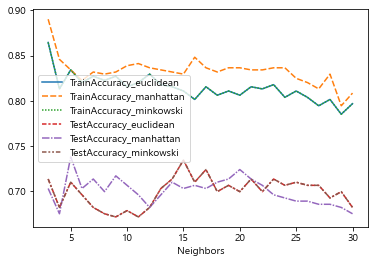

In [325]:
# 정확도를 그래프로 그림
df_accuracy_metric_pivot = df_accuracy_metric.pivot(index = "Neighbors", columns = "Metric",
                                                    values = ["TrainAccuracy", "TestAccuracy"])

level0 = df_accuracy_metric_pivot.columns.get_level_values(0)
level1 = df_accuracy_metric_pivot.columns.get_level_values(1)
df_accuracy_metric_pivot.columns = level0 + "_" + level1
sns.lineplot(data = df_accuracy_metric_pivot)

In [323]:
# 최종 모델
knn_model = KNeighborsClassifier(n_neighbors = 15, weights = "distance", metric = "euclidean")
knn_model.fit(df_train_x, df_train_y)
# 평가
y_pred = knn_model.predict(df_test_x)
# train 데이터 셋 정확도
print("train data accuracy: {0:.3f}".format(knn_model.score(df_train_x, df_train_y)))
# test 데이터 셋 정확도
print("test data accuracy: {0:.3f}\n".format(knn_model.score(df_test_x, df_test_y)))
# confusion matrix
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

# 목표변수의 빈도 불균형 : f1 score로 모델 평가 
print(classification_report(df_test_y, y_pred, digits=3))

C:\Users\pyund\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


train data accuracy: 1.000
test data accuracy: 0.738

Confusion matrix: 
[[ 44  51]
 [ 24 167]]
              precision    recall  f1-score   support

          불량      0.647     0.463     0.540        95
          양품      0.766     0.874     0.817       191

    accuracy                          0.738       286
   macro avg      0.707     0.669     0.678       286
weighted avg      0.727     0.738     0.725       286



# 모델평가

In [349]:
# 분류 Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc

In [373]:
models = ["의사결정나무", "랜덤 포레스트", "그래디언트 부스팅","뉴럴넷"]
train_accuracy = []
test_accuracy = []
model_auc=[]
model_precision = []
model_recall=[]
model_f1_score=[]

In [371]:
def abc(x):
    if x =='양품':
        return 1
    if x =='불량':
        return 0

df['SCALE'] = df['SCALE'].apply(abc)
df_raw_x = df.drop('SCALE', axis = 1)
df_raw_y = df[['SCALE']]
df_raw_y
df_raw_dummy = pd.get_dummies(df_raw_x)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_dummy, # 설명변수 데이터
                                                                df_raw_y, # 목표변수 데이터
                                                                test_size = 0.3, # test 데이터의 비율
                                                                random_state = 1234)  # random state

print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))
df_raw_y

train data X size : (499, 100)
train data Y size : (499, 1)
test data X size : (215, 100)
test data Y size : (215, 1)


,SCALE
0,1
1,1
2,1
3,1
4,1
...,...
715,0
716,1
717,1
718,1


In [381]:
v_feature_name = df_raw_dummy.columns
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_raw_dummy)
df_scaled = pd.DataFrame(df_scaled, columns=v_feature_name)
df_scaled

,PT_THICK,PT_WIDTH,PT_LENGTH,PT_WEIGHT,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,...,FUR_NO_2호기,FUR_NO_3호기,FUR_NO_ROW_1열,FUR_NO_ROW_2열,HSB_미적용,HSB_적용,WORK_GR_1조,WORK_GR_2조,WORK_GR_3조,WORK_GR_4조
0,0.165524,1.738825,-1.399249,-1.102663,-0.550140,0.764075,-0.958762,-0.626900,-0.401705,-0.824152,...,-0.702655,-0.709336,0.994413,-0.994413,-0.220132,0.220132,-0.597841,1.83130,-0.556859,-0.608639
1,0.165524,1.738825,-1.399249,-1.102663,-0.550140,0.929201,-0.844450,-0.856285,-0.379613,-1.105167,...,-0.702655,-0.709336,-1.005618,1.005618,-0.220132,0.220132,-0.597841,1.83130,-0.556859,-0.608639
2,0.219261,1.568260,-1.103953,-0.943272,-1.270256,0.764075,-1.644633,-0.779823,-0.401705,-1.892008,...,1.423174,-0.709336,0.994413,-0.994413,-0.220132,0.220132,-0.597841,-0.54606,1.795787,-0.608639
3,0.219261,1.568260,-1.103953,-0.943272,-0.166077,1.011765,-1.301698,-0.282822,0.349415,-1.498588,...,1.423174,-0.709336,-1.005618,1.005618,-0.220132,0.220132,-0.597841,-0.54606,1.795787,-0.608639
4,0.485835,0.558436,-1.527970,-1.173279,-0.742171,1.259454,-1.244542,-1.047439,0.305232,-1.217573,...,-0.702655,1.409769,0.994413,-0.994413,-0.220132,0.220132,1.672684,-0.54606,-0.556859,-0.608639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,-0.472463,1.492668,0.307114,-0.792355,0.794078,-0.446851,0.813071,-0.512207,-1.219101,0.861936,...,-0.702655,1.409769,0.994413,-0.994413,-0.220132,0.220132,-0.597841,1.83130,-0.556859,-0.608639
710,-0.739037,0.779396,1.002858,-0.934798,-0.262093,-0.749582,1.098850,-0.550438,-1.373743,1.142951,...,1.423174,-0.709336,0.994413,-0.994413,-0.220132,0.220132,1.672684,-0.54606,-0.556859,-0.608639
711,-0.658960,1.223253,0.673261,-0.884358,0.650055,-0.639498,0.755915,0.061255,-1.174917,0.693327,...,1.423174,-0.709336,-1.005618,1.005618,-0.220132,0.220132,-0.597841,-0.54606,-0.556859,1.643010
712,-0.712169,1.072070,1.039625,1.562992,1.130133,-0.061556,0.755915,-1.162131,-1.263285,0.805733,...,-0.702655,1.409769,-1.005618,1.005618,-0.220132,0.220132,-0.597841,1.83130,-0.556859,-0.608639


In [382]:
df_train_x, df_test_x = train_test_split(df_scaled,test_size = 0.3, # test 데이터의 비율
                                                                random_state = 1234)  # random state


In [374]:
tree_final = DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 4,min_samples_split=30, random_state=1234)
tree_final.fit(df_train_x, df_train_y)

train_accuracy.append(tree_final.score(df_train_x,df_train_y))
test_accuracy.append(tree_final.score(df_test_x,df_test_y))
y_pred =tree_final.predict(df_test_x)
fpr,tpr,thresholds = roc_curve(df_test_y,y_pred)
roc_auc=auc(fpr,tpr)
model_auc.append(roc_auc)

In [375]:
model_precision.append(precision_score(df_test_y,y_pred))
model_recall.append(recall_score(df_test_y,y_pred))
model_f1_score.append(f1_score(df_test_y,y_pred))

In [377]:
rf_final = RandomForestClassifier(min_samples_leaf = 2, min_samples_split = 8, max_depth = 12, n_estimators = 80, random_state=1234)
rf_final.fit(df_train_x, df_train_y)
train_accuracy.append(rf_final.score(df_train_x,df_train_y))
test_accuracy.append(rf_final.score(df_test_x,df_test_y))
y_pred =rf_final.predict(df_test_x)
fpr,tpr,thresholds = roc_curve(df_test_y,y_pred)
roc_auc=auc(fpr,tpr)
model_auc.append(roc_auc)

<ipython-input-377-422b7571cf81>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_final.fit(df_train_x, df_train_y)


In [378]:
model_precision.append(precision_score(df_test_y,y_pred))
model_recall.append(recall_score(df_test_y,y_pred))
model_f1_score.append(f1_score(df_test_y,y_pred))

In [379]:
gb_final = GradientBoostingClassifier(min_samples_leaf = 10,min_samples_split=70, max_depth = 8, n_estimators = 150,
                                      learning_rate = 0.3, random_state=1234)
gb_final.fit(df_train_x, df_train_y)
# 예측
y_pred = gb_final.predict(df_test_x)
train_accuracy.append(gb_final.score(df_train_x,df_train_y))
test_accuracy.append(gb_final.score(df_test_x,df_test_y))
fpr,tpr,thresholds = roc_curve(df_test_y,y_pred)
roc_auc=auc(fpr,tpr)
model_auc.append(roc_auc)

C:\Users\pyund\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [380]:
model_precision.append(precision_score(df_test_y,y_pred))
model_recall.append(recall_score(df_test_y,y_pred))
model_f1_score.append(f1_score(df_test_y,y_pred))

In [383]:
nn_final = MLPClassifier(hidden_layer_sizes = (140, 140), activation = "tanh", solver = "adam",
                         batch_size = 50, random_state = 1234)
nn_final.fit(df_train_x, df_train_y)

# 평가
y_pred = nn_final.predict(df_test_x)
train_accuracy.append(nn_final.score(df_train_x,df_train_y))
test_accuracy.append(nn_final.score(df_test_x,df_test_y))
fpr,tpr,thresholds = roc_curve(df_test_y,y_pred)
roc_auc=auc(fpr,tpr)
model_auc.append(roc_auc)

C:\Users\pyund\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [389]:
print("Accucary on training set: {:.3f}".format(nn_final.score(df_train_x, df_train_y)))
# test 데이터 셋 정확도
print("Accuracy on test set: {:.3f}\n".format(nn_final.score(df_test_x, df_test_y)))
# confusion matrix
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))


Accucary on training set: 1.000
Accuracy on test set: 0.791

Confusion matrix: 
[[ 53  18]
 [ 27 117]]


In [384]:
model_precision.append(precision_score(df_test_y,y_pred))
model_recall.append(recall_score(df_test_y,y_pred))
model_f1_score.append(f1_score(df_test_y,y_pred))

In [387]:
df_eval =pd.DataFrame(index = models)
df_eval['Trainacc'] = train_accuracy
df_eval['Testacc']=test_accuracy
df_eval['Prec']=model_precision
df_eval['Recall']=model_recall
df_eval['f1']=model_f1_score
df_eval.round(3)

,Trainacc,Testacc,Prec,Recall,f1
의사결정나무,0.976,0.953,0.935,1.000,0.966
랜덤 포레스트,0.976,0.944,0.923,1.000,0.960
그래디언트 부스팅,1.000,0.995,1.000,0.993,0.997
뉴럴넷,1.000,0.791,0.867,0.812,0.839


<AxesSubplot:>

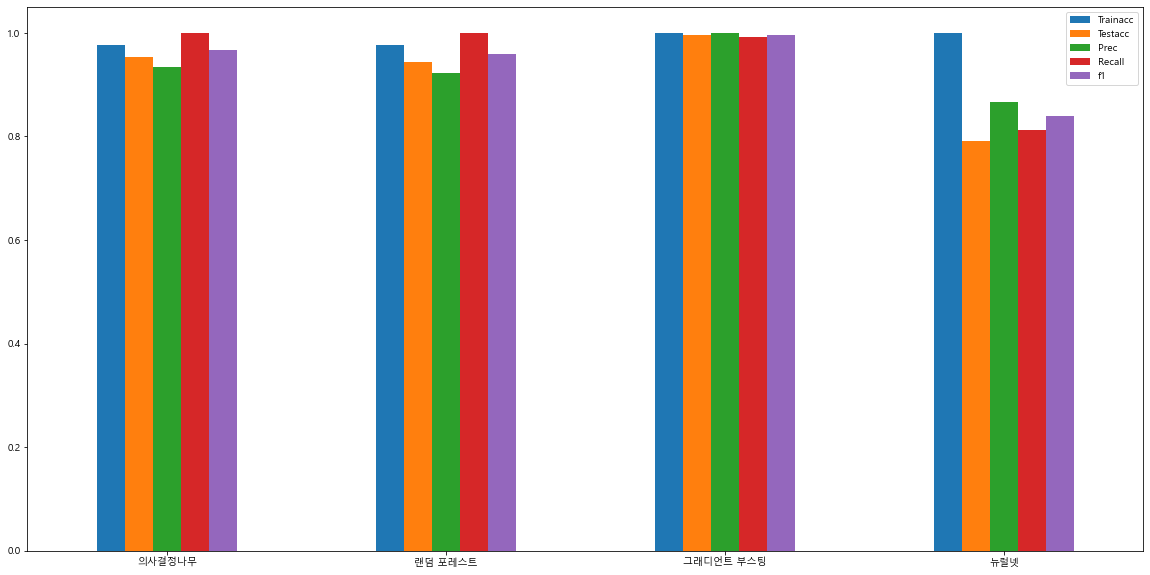

In [388]:
df_eval.plot.bar(rot=0,figsize=(20,10))

In [390]:
from scipy import stats
from scipy.stats import shapiro, norm, t
from scipy.stats import bartlett

In [392]:
df1 =df.loc[df['SCALE']==1]
df1  =df1['ROLLING_TEMP_T5']

In [398]:
df1 = pd.DataFrame(df1)
df1

,ROLLING_TEMP_T5
0,934
1,937
2,889
3,885
4,873
...,...
714,948
716,947
717,948
718,940


In [394]:
df2 =df.loc[df['SCALE']==0]
df2  =df2['ROLLING_TEMP_T5']

In [397]:
df2 = pd.DataFrame(df2)
df2

,ROLLING_TEMP_T5
11,1057
15,929
60,851
71,847
79,847
...,...
677,1037
683,947
685,1004
700,878


In [401]:
sns.boxplot(df1,df2)

C:\Users\pyund\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

<AxesSubplot:>

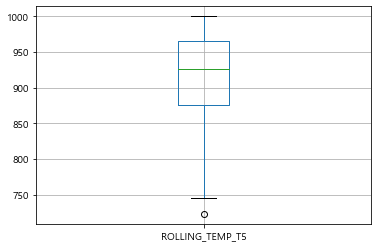

In [402]:
df1.boxplot()

<AxesSubplot:>

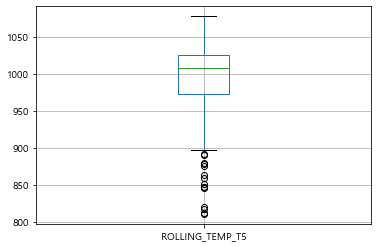

In [403]:
df2.boxplot()

<AxesSubplot:xlabel='SCALE', ylabel='ROLLING_TEMP_T5'>

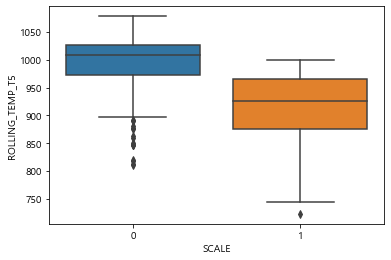

In [407]:
sns.boxplot(x= df['SCALE'],y=df['ROLLING_TEMP_T5'])

<AxesSubplot:xlabel='SCALE', ylabel='FUR_SZ_TEMP'>

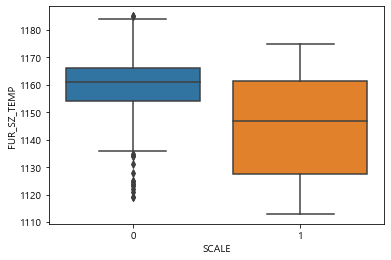

In [408]:
sns.boxplot(x= df['SCALE'],y=df['FUR_SZ_TEMP'])

In [ ]:
- 가설1 : HSB가 적용되지 않은 철판은 전부 불량일 것이다.
- 가설2 : Scale 불량은 제품의 두께,폭,길이등 제품의 특성과 관련이 있을 것이다. 
- 가설3 : 어느 가열로에 문제가 있어 해당 가열로에서 불량이 많이 생길 것이다.
- 가설4 : 가열대 혹은 군열대에 문제가 있어 해당 공정에서 불량이 생길 것이다.
